In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
# from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

In [9]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_sla.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
    print(filename)
    site = filename.split('sla_')[1]
    site_name.append(site)

tiff_dir = r'D:\wenqu\chapter1_2\updated_aviris\clipped_aviris\single_aviris_pixel\AVIRIS_NG_ALL'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

sla_site1b_023_040_clipped.tif
sla_site1b_024_016_clipped.tif
sla_site1b_024_018_clipped.tif
sla_site1b_024_022_clipped.tif
sla_site1b_024_030_clipped.tif
sla_site1b_024_031_clipped.tif
sla_site1b_025_018_clipped.tif
sla_site1b_025_026_clipped.tif
sla_site1b_025_031_clipped.tif
sla_site1b_025_033_clipped.tif
sla_site1b_025_035_clipped.tif
sla_site1b_025_039_clipped.tif
sla_site1b_025_041_clipped.tif
sla_site1b_026_007_clipped.tif
sla_site1b_026_008_clipped.tif
sla_site1b_026_011_clipped.tif
sla_site1b_026_018_clipped.tif
sla_site1b_026_034_clipped.tif
sla_site1b_027_007_clipped.tif
sla_site1b_027_034_clipped.tif
sla_site1b_027_035_clipped.tif
sla_site1b_027_044_clipped.tif
sla_site1b_028_009_clipped.tif
sla_site1b_028_019_clipped.tif
sla_site1b_028_035_clipped.tif
sla_site1b_029_012_clipped.tif
sla_site1b_029_021_clipped.tif
sla_site1b_029_026_clipped.tif
sla_site1b_029_028_clipped.tif
sla_site1b_029_042_clipped.tif
sla_site1b_029_044_clipped.tif
sla_site1b_030_009_clipped.tif
sla_site

site6_013_053_clipped.tif
site6_013_054_clipped.tif
site6_013_055_clipped.tif
site6_014_048_clipped.tif
site6_014_050_clipped.tif
site6_014_051_clipped.tif
site6_014_052_clipped.tif
site6_014_053_clipped.tif
site6_015_047_clipped.tif
site6_016_046_clipped.tif
site6_017_048_clipped.tif
site6_018_046_clipped.tif
site6_019_045_clipped.tif
site6_019_046_clipped.tif
site6_019_047_clipped.tif
site6_019_048_clipped.tif
site6_020_045_clipped.tif
site6_020_046_clipped.tif
site6_020_047_clipped.tif
site6_020_049_clipped.tif
site6_021_043_clipped.tif
site6_021_044_clipped.tif
site6_021_045_clipped.tif
site6_021_046_clipped.tif
site6_021_048_clipped.tif
site6_022_041_clipped.tif
site6_022_042_clipped.tif
site6_022_043_clipped.tif
site6_022_044_clipped.tif
site6_022_045_clipped.tif
site6_022_047_clipped.tif
site6_023_038_clipped.tif
site6_023_041_clipped.tif
site6_023_043_clipped.tif
site6_024_037_clipped.tif
site6_024_039_clipped.tif
site6_024_040_clipped.tif
site6_024_041_clipped.tif
site6_024_04

In [10]:
df_spectral = df
df_spectral.head()  #

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_023_040_clipped.tif,0.045220,0.041748,0.042282,0.040922,0.042815,0.040010,0.037958,0.038371,0.036112,...,0.063685,0.051910,0.061370,0.053125,0.066676,0.057680,0.123556,0.088136,0.087504,-0.01
1,site1b_024_016_clipped.tif,0.048939,0.046364,0.044615,0.044824,0.042590,0.039332,0.038095,0.037492,0.035918,...,0.037516,0.043186,0.039395,0.042552,0.054276,0.164978,0.090032,0.068948,0.083395,-0.01
2,site1b_024_018_clipped.tif,0.048934,0.044142,0.042059,0.039934,0.039587,0.036803,0.035807,0.036525,0.034081,...,0.041784,0.037559,0.048106,0.054135,0.042648,0.037521,0.103987,0.062151,0.062152,-0.01
3,site1b_024_022_clipped.tif,0.049881,0.048410,0.043863,0.044790,0.042539,0.038298,0.037221,0.036300,0.034691,...,0.066684,0.057506,0.059021,0.071539,0.063961,0.076524,0.073048,0.074294,0.098398,-0.01
4,site1b_024_030_clipped.tif,0.048836,0.046687,0.043086,0.041445,0.043002,0.039869,0.038701,0.039223,0.037710,...,0.075644,0.057538,0.068110,0.038588,0.080825,0.092814,0.107196,0.084620,0.077490,-0.01


In [11]:
labels = [] 
for i in range(len(df_spectral['filename'])):
    substrings = df_spectral['filename'][i]
    site_name = substrings.split("_")[0]
    labels.append(site_name)

In [12]:
# print(len(labels), labels)


In [13]:
def plot_mse_vs_components(X, y, max_comp, wavelengths=None):
    """
    Perform PLS variable selection and optimize the number of components.

    Parameters:
    X (numpy.ndarray): Predictor variables (samples x wavelengths).
    y (numpy.ndarray): Response variable (samples x 1 or 1D array).
    max_comp (int): Maximum number of PLS components to test.
    wavelengths (numpy.ndarray, optional): Actual wavelength values (same length as X.shape[1]).

    Returns:
    tuple:
        - X_reduced (numpy.ndarray): Reduced predictor variables with selected wavelengths.
        - n_comp_opt (int): Optimized number of PLS components.
        - wavelengths_to_keep (numpy.ndarray): Indices of wavelengths to keep.
        - sorted_ind (numpy.ndarray): Sorted feature indices by importance.
    """
    mse = np.zeros((max_comp, X.shape[1] - max_comp + 1))

    for i in range(max_comp):
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)

        # Sort features by absolute regression coefficient values
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
        Xc = X[:, sorted_ind]

        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1])
        for j in range(max_j):
            pls2 = PLSRegression(n_components=i + 1)
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))

        stdout.write(f"\r{i + 1}/{max_comp} components processed")
        stdout.flush()

    stdout.write("\n")

    # Handle edge case for all-zero MSE
    non_zero_mse = mse[np.nonzero(mse)]
    if non_zero_mse.size == 0:
        raise ValueError("MSE array contains no valid values. Check your data.")

    # Find the combination with the minimum MSE
    mseminx, mseminy = np.where(mse == np.min(non_zero_mse))
    n_comp_opt = mseminx[0] + 1
    start_feature_index = mseminy[0]

    # Fit again to get the final sorted feature importance
    pls_final = PLSRegression(n_components=n_comp_opt )
    pls_final.fit(X, y)
    sorted_ind = np.argsort(np.abs(pls_final.coef_.flatten()))

    # Get the wavelength indices to keep and corresponding coefficients
    wavelengths_to_keep = sorted_ind[start_feature_index:]
    final_coefs = pls_final.coef_.flatten()[wavelengths_to_keep]

    # Build separate lists
    wavelength_index_list = wavelengths_to_keep.tolist()
    coefficient_list = final_coefs.tolist()

    # Print summary
    print(f"\nOptimal number of components: {n_comp_opt}")
    print(f"Start feature index: {start_feature_index}")
    print(f"\nWavelength indices to keep: {wavelength_index_list}")
    print(f"Corresponding coefficients: {coefficient_list}")

    if wavelengths is not None:
        print("\nWavelength (nm) and coefficient pairs:")
        for idx, coef in zip(wavelength_index_list, coefficient_list):
            print(f"Wavelength {wavelengths[idx]:.2f} nm (Index {idx}): Coefficient {coef:.6f}")
    else:
        print("\nIndex and coefficient pairs:")
        for idx, coef in zip(wavelength_index_list, coefficient_list):
            print(f"Index {idx}: Coefficient {coef:.6f}")

    X_reduced = X[:, wavelengths_to_keep]
    return X_reduced, n_comp_opt, wavelengths_to_keep, sorted_ind


In [27]:
def simple_pls_cv(X, y, n_comp, labels, filename):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
    y_cv = cross_val_predict(pls, X, y, cv=20)

    # Flatten for evaluation
    y_flat = y.ravel()
    y_c_flat = y_c.ravel()
    y_cv_flat = y_cv.ravel()

    # Calculate scores
    score_c = r2_score(y_flat, y_c_flat)
    score_cv = r2_score(y_flat, y_cv_flat)
    # rmse_c = mean_squared_error(y_flat, y_c_flat, squared=False)
    # rmse_cv = mean_squared_error(y_flat, y_cv_flat, squared=False)



    rmse_c = np.sqrt(mean_squared_error(y_flat, y_c_flat))  # <-- fixed
    rmse_cv = np.sqrt(mean_squared_error(y_flat, y_cv_flat))  # <-- fixed


    print(f'R2 calib: {score_c:5.3f}')
    print(f'R2 CV: {score_cv:5.3f}')
    print(f'RMSE calib: {rmse_c:5.3f}')
    print(f'RMSE CV: {rmse_cv:5.3f}')

    # Fit a linear trend line to predicted vs measured
    z = np.polyfit(y_flat, y_cv_flat, 1)
    print(f"Intercept: {z[1]}, Slope: {z[0]}")

    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Label styling dictionary
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}
        }

        # Write to CSV and scatter each point
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                csvwriter.writerow([i, label, y_cv_flat[i], y_flat[i]])

        for i, label in enumerate(labels):
            props = label_dict.get(label, {'marker': 'x', 'color': 'gray'})
            ax.scatter(y_cv_flat[i], y_flat[i], marker=props['marker'],
                       c=props['color'], edgecolors='k', label=label if i == 0 else "")

        # Create legend
        legend_handles = [
            plt.Line2D([], [], marker=props['marker'], color=props['color'],
                       linestyle='None', label=label)
            for label, props in label_dict.items()
        ]
        ax.legend(handles=legend_handles)

        # Plot regression line and 1:1 line
        ax.plot(z[1] + z[0] * y_flat, y_flat, c='red', linewidth=1, label='Fit line')
        ax.plot(y_flat, y_flat, color='black', linewidth=1, label='1:1 line')

        ax.set_title(f'$R^2$ (CV): {score_cv:.3f}')
        ax.set_xlabel('Predicted $^{\circ}$Brix')
        ax.set_ylabel('Measured $^{\circ}$Brix')
        plt.show()

R2 calib: 0.841
R2 CV: 0.802
RMSE calib: 0.042
RMSE CV: 0.047
Intercept: 0.844386773931323, Slope: 0.8140390688711987


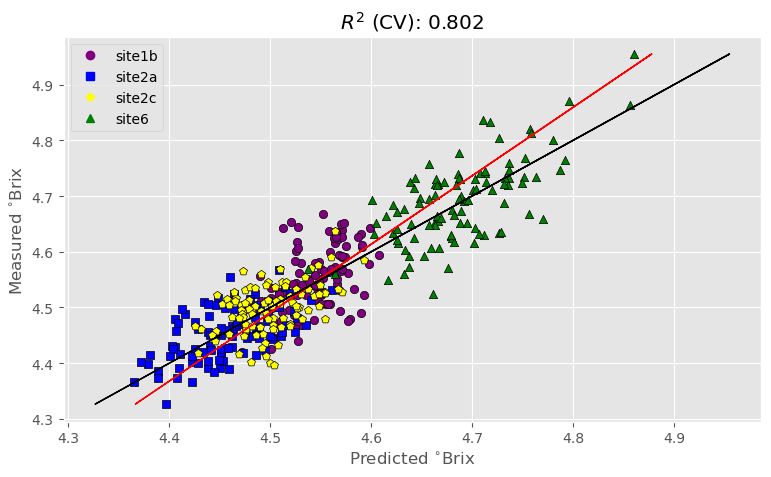

In [30]:
file_name_sla_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\sla_max_resampled.csv'
simple_pls_cv(opt_Xc_sla_max, y_sla_max,                             
                             ncomp_sla_max, labels, file_name_sla_max)

# d13c

In [8]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_d13c.npy',  allow_pickle=True)

In [9]:
d13c_trait_pdf_ymax.shape

(400, 2)

In [10]:
y_d13c_max_df = pd.DataFrame(d13c_trait_pdf_ymax, columns=['y_value', 'filename'])
y_d13c_max_df['filename'] = y_d13c_max_df['filename'].str.replace('d13c_', '')

y_d13c_max_df['y_value'] = pd.to_numeric(y_d13c_max_df['y_value'])
y_d13c_max_df_array = y_d13c_max_df.to_numpy()
y_d13c_max_df
# Merge y1_cleaned with df_spectral
merged_y_d13c_max_df = pd.merge(df_spectral, y_d13c_max_df, on='filename')
# #  # Band columns as predictors
merged_y_d13c_max_df   
X_d13c_ymax = merged_y_d13c_max_df.filter(regex='^band_').values 

y_d13c_max = merged_y_d13c_max_df[['y_value']].values  
y_d13c_max.shape

(400, 1)

In [11]:
# Call the model function
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max  = plot_mse_vs_components(X_d13c_ymax, y_d13c_max, 20)
# opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(X_d13c_std1, y_d13c_std1, 50)


20/20 components processed

Optimal number of components: 9
Start feature index: 404

Wavelength indices to keep: [316, 60, 57, 12, 313, 303, 61, 215, 0, 59, 219, 35, 9, 311, 408, 416, 193, 310, 289, 10, 14]
Corresponding coefficients: [-0.06855747403976176, 0.07175058949737087, 0.07200801580895588, -0.07348070747372305, -0.07387424463801501, 0.07422552041529812, 0.07432281136562126, -0.07603667189238673, 0.07713020482376429, 0.07935825245236268, -0.0811046919532715, -0.08202724677143511, -0.08373586643065155, -0.08555149531543546, 0.08879866279493664, 0.10469513213344075, 0.1126139340516709, 0.14501014029555012, 0.16842380250448785, -0.17403425567622213, 0.20030354872028325]

Index and coefficient pairs:
Index 316: Coefficient -0.068557
Index 60: Coefficient 0.071751
Index 57: Coefficient 0.072008
Index 12: Coefficient -0.073481
Index 313: Coefficient -0.073874
Index 303: Coefficient 0.074226
Index 61: Coefficient 0.074323
Index 215: Coefficient -0.076037
Index 0: Coefficient 0.077130

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.699
R2 CV: 0.660
RMSE calib: 0.270
RMSE CV: 0.287
Intercept: -9.012486151566725, Slope: 0.6818606199780757


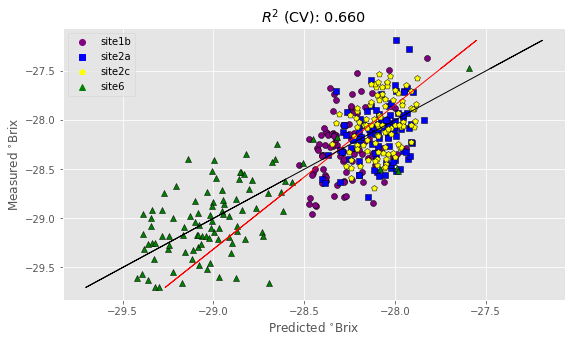

In [18]:
file_name_d13c_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d13c_max_resampled.csv'
simple_pls_cv(opt_Xc_d13c_max, y_d13c_max,
              ncomp_d13c_max, labels, file_name_d13c_max)

In [19]:
pls_final = PLSRegression(n_components=ncomp_d13c_max, scale=True)
pls_final.fit(opt_Xc_d13c_max, y_d13c_max)

# 1. Compute training stats
X_mean = opt_Xc_d13c_max.mean(axis=0)
X_std = opt_Xc_d13c_max.std(axis=0, ddof=0)  # population std
y_mean = y_d13c_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)

Scaled Coefficients: [-5.87132223e+00  1.23578631e+01  1.06179031e+01 -2.25147927e+01
 -2.91710089e+00  1.60610532e-02  1.29953437e+01 -6.96087846e+00
  4.77941733e+00  9.35522572e+00 -1.26178112e+01 -3.95608205e+01
 -2.73066850e+01 -1.98246864e-01  8.22868512e+00  6.91231744e+00
  2.95444975e+00  5.29342610e-02  9.26717604e-02 -4.85741451e+01
  5.35902618e+01]
Adjusted Intercept: -26.16598626048853


In [20]:
scaled_coefs

array([-5.87132223e+00,  1.23578631e+01,  1.06179031e+01, -2.25147927e+01,
       -2.91710089e+00,  1.60610532e-02,  1.29953437e+01, -6.96087846e+00,
        4.77941733e+00,  9.35522572e+00, -1.26178112e+01, -3.95608205e+01,
       -2.73066850e+01, -1.98246864e-01,  8.22868512e+00,  6.91231744e+00,
        2.95444975e+00,  5.29342610e-02,  9.26717604e-02, -4.85741451e+01,
        5.35902618e+01])

In [21]:
pls_final.intercept_

array([-28.36028762])

In [25]:
adjusted_intercept

-26.16598626048853

# d13 std

In [22]:
y_d13c_std_df = pd.DataFrame(d13c_trait_pdf_std, columns=['y_value', 'filename'])
y_d13c_std_df['filename'] = y_d13c_std_df['filename'].str.replace('d13c_', '')

y_d13c_std_df['y_value'] = pd.to_numeric(y_d13c_std_df['y_value'])

y_d13c_std_df_array = y_d13c_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d13c_std_df = pd.merge(df_spectral, y_d13c_std_df, on='filename')
 # Band columns as predictors
    
X_d13c_std = merged_y_d13c_std_df.filter(regex='^band_').values 
y_d13c_std = merged_y_d13c_std_df[['y_value']].values  

In [23]:
print(X_d13c_std.shape, y_d13c_std.shape)

(400, 425) (400, 1)


In [26]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std  = plot_mse_vs_components(X_d13c_std, y_d13c_std, 30)

30/30 components processed

Optimal number of components: 20
Start feature index: 270

Wavelength indices to keep: [178, 181, 85, 154, 84, 26, 41, 0, 258, 42, 146, 99, 80, 299, 408, 355, 325, 357, 192, 367, 135, 306, 266, 294, 298, 305, 293, 295, 169, 292, 237, 185, 401, 186, 94, 197, 221, 20, 265, 296, 368, 98, 109, 127, 282, 190, 318, 384, 244, 320, 34, 144, 21, 309, 345, 187, 70, 222, 291, 175, 50, 377, 331, 391, 141, 396, 172, 161, 126, 218, 45, 86, 40, 96, 4, 286, 33, 229, 32, 27, 136, 386, 6, 145, 30, 123, 249, 383, 238, 82, 304, 246, 51, 55, 37, 142, 52, 116, 223, 162, 375, 16, 314, 56, 349, 124, 279, 311, 176, 328, 57, 256, 297, 83, 277, 263, 59, 106, 95, 157, 242, 25, 239, 103, 283, 149, 392, 276, 369, 3, 313, 152, 5, 374, 68, 49, 31, 312, 202, 65, 371, 315, 205, 324, 23, 232, 18, 151, 24, 301, 316, 110, 203, 206, 155]
Corresponding coefficients: [-0.10766473522667798, -0.10785981299147247, -0.10788714307369182, 0.10839594959088272, -0.10928542726959685, -0.11136533847052767, 

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.936
R2 CV: 0.787
RMSE calib: 0.143
RMSE CV: 0.260
Intercept: 0.2270100939338983, Slope: 0.8110422164294727


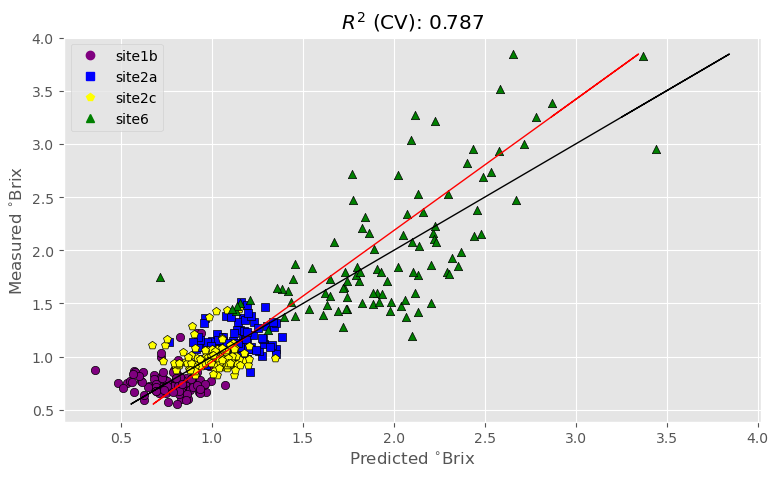

In [27]:
file_name_d13c_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d13c_std_resampled.csv'
simple_pls_cv(opt_Xc_d13c_std, y_d13c_std,
              ncomp_d13c_std, labels, file_name_d13c_std)

In [28]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_d13c_std, scale=True)
pls_final.fit(opt_Xc_d13c_std, y_d13c_std)

# 1. Compute training stats
X_mean = opt_Xc_d13c_std.mean(axis=0)
X_std = opt_Xc_d13c_std.std(axis=0, ddof=0)  # population std
y_mean = y_d13c_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [-2.09270131e+00 -1.58136629e+00 -5.53658930e-01 -1.79222218e+00
 -1.95075809e+00  3.69945786e+00  8.26567659e+00 -6.48581978e+00
 -8.88645459e+00  7.13246828e-01 -5.14628544e+00  7.94995779e+00
 -1.82855206e+00  4.09586419e-03 -5.49218070e+00 -9.35345671e+00
 -1.76382997e+00 -5.41680440e+00 -1.59566545e+00 -5.30152729e+00
  5.50545156e+00  3.17443885e-03  1.49826981e+01  3.02115038e-03
  3.75272357e-03  2.13411398e-03  4.28455731e-03  2.60695690e-03
 -5.81340188e+00  2.86713175e-03  9.28007506e+00 -5.31564307e+00
  1.27645444e+01  3.48095536e+00  2.84298917e+00  6.74807918e-03
 -3.53155368e+00  1.40503019e+01  8.24071383e+00  4.53804767e-03
  1.03911364e+01  9.74119274e+00  2.95214566e+00 -1.34296170e+01
 -1.49232522e+00  2.44298497e+00  2.58742843e+00  1.78138788e+00
  9.48550472e+00 -8.98648720e+00 -1.78974276e+01 -1.48599352e+01
  1.72485570e+00  2.96759829e-02 -4.17255061e+00  2.41648215e+00
 -8.21017833e+00  9.27582795e-01  5.84343108e-03  1.22209420e+01
  4.

In [29]:
scaled_coefs

array([-2.09270131e+00, -1.58136629e+00, -5.53658930e-01, -1.79222218e+00,
       -1.95075809e+00,  3.69945786e+00,  8.26567659e+00, -6.48581978e+00,
       -8.88645459e+00,  7.13246828e-01, -5.14628544e+00,  7.94995779e+00,
       -1.82855206e+00,  4.09586419e-03, -5.49218070e+00, -9.35345671e+00,
       -1.76382997e+00, -5.41680440e+00, -1.59566545e+00, -5.30152729e+00,
        5.50545156e+00,  3.17443885e-03,  1.49826981e+01,  3.02115038e-03,
        3.75272357e-03,  2.13411398e-03,  4.28455731e-03,  2.60695690e-03,
       -5.81340188e+00,  2.86713175e-03,  9.28007506e+00, -5.31564307e+00,
        1.27645444e+01,  3.48095536e+00,  2.84298917e+00,  6.74807918e-03,
       -3.53155368e+00,  1.40503019e+01,  8.24071383e+00,  4.53804767e-03,
        1.03911364e+01,  9.74119274e+00,  2.95214566e+00, -1.34296170e+01,
       -1.49232522e+00,  2.44298497e+00,  2.58742843e+00,  1.78138788e+00,
        9.48550472e+00, -8.98648720e+00, -1.78974276e+01, -1.48599352e+01,
        1.72485570e+00,  

In [30]:
adjusted_intercept

-0.5032873949105687

# d15n

In [9]:
d15n_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_d15n.npy',  allow_pickle=True)

In [10]:
y_d15n_max = np.array(d15n_trait_pdf_ymax)
y_d15n_std = np.array(d15n_trait_pdf_std)

In [11]:
y_d15n_max.shape

(400, 2)

In [12]:
y_d15n_max_df = pd.DataFrame(y_d15n_max, columns=['y_value', 'filename'])
y_d15n_max_df['filename'] = y_d15n_max_df['filename'].str.replace('d15n_', '')

y_d15n_max_df['y_value'] = pd.to_numeric(y_d15n_max_df['y_value'])
y_d15n_max_df_array = y_d15n_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d15n_max_df = pd.merge(df_spectral, y_d15n_max_df, on='filename')
 # Band columns as predictors
    
X_d15n_ymax = merged_y_d15n_max_df.filter(regex='^band_').values 
y_d15n_max = merged_y_d15n_max_df[['y_value']].values  

In [13]:
y_d15n_std_df = pd.DataFrame(y_d15n_std, columns=['y_value', 'filename'])
y_d15n_std_df['filename'] = y_d15n_std_df['filename'].str.replace('d15n_', '')

y_d15n_std_df['y_value'] = pd.to_numeric(y_d15n_std_df['y_value'])
y_d15n_std_df_array = y_d15n_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d15n_std_df = pd.merge(df_spectral, y_d15n_std_df, on='filename')
 # Band columns as predictors
    
X_d15n_std = merged_y_d15n_std_df.filter(regex='^band_').values 
y_d15n_std = merged_y_d15n_std_df[['y_value']].values  

In [14]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(X_d15n_ymax, y_d15n_max, 30)


30/30 components processed

Optimal number of components: 12
Start feature index: 305

Wavelength indices to keep: [120, 122, 379, 345, 110, 48, 151, 242, 333, 61, 254, 174, 199, 126, 213, 394, 334, 317, 155, 357, 371, 224, 57, 336, 24, 304, 264, 255, 216, 421, 396, 381, 363, 221, 319, 179, 281, 207, 343, 114, 195, 214, 165, 200, 62, 35, 18, 153, 308, 190, 8, 17, 60, 215, 263, 397, 149, 72, 422, 212, 29, 66, 407, 37, 267, 20, 314, 23, 211, 36, 1, 9, 284, 220, 44, 222, 69, 282, 32, 408, 210, 286, 25, 288, 398, 67, 316, 374, 5, 324, 307, 6, 385, 312, 64, 401, 70, 4, 400, 10, 26, 315, 285, 412, 22, 399, 15, 14, 2, 205, 405, 301, 283, 12, 409, 38, 302, 289, 311, 0]
Corresponding coefficients: [0.10217963417776571, 0.10224285674164073, 0.10315688551839322, 0.10433947666707369, -0.10750424044822599, -0.10770273036646688, -0.10943275945553894, -0.11053127709203385, 0.11069519222536264, 0.11260496088504453, -0.11318072288908894, 0.11405200675432964, 0.11670971172284984, 0.11674233804745283, -0

In [38]:
ncomp_d15n_max

12

R2 calib: 0.733
R2 CV: 0.543
RMSE calib: 0.445
RMSE CV: 0.582
Intercept: -0.7586431076842003, Slope: 0.6249188680426077


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


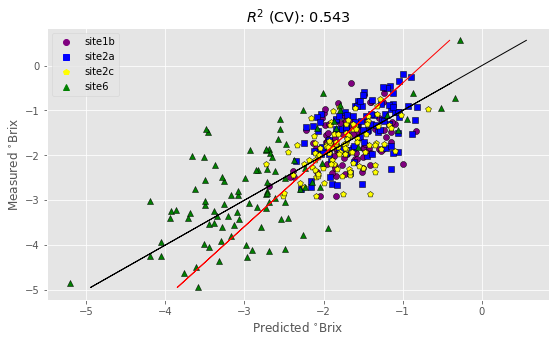

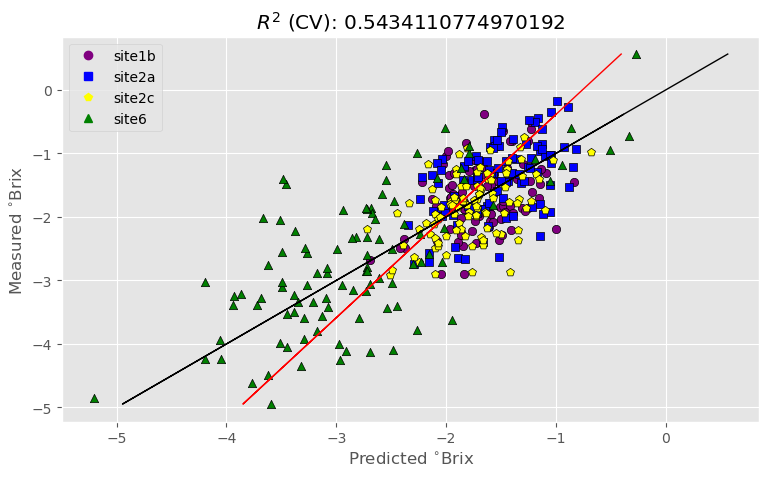

In [15]:
file_name_d15n_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d15n_max_resampled.csv'
simple_pls_cv(opt_Xc_d15n_max, y_d15n_max, ncomp_d15n_max, labels, file_name_d15n_max)

In [16]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_d15n_max, scale=True)
pls_final.fit(opt_Xc_d15n_max, y_d15n_max)

# 1. Compute training stats
X_mean = opt_Xc_d15n_max.mean(axis=0)
X_std = opt_Xc_d15n_max.std(axis=0, ddof=0)  # population std
y_mean = y_d15n_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
# print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Adjusted Intercept: -5.051895373135613


In [17]:
scaled_coefs

array([ 6.18174157e+00,  7.06670855e+00,  1.17122193e+01,  1.17329353e+01,
       -4.81461955e+00, -1.23326274e+01, -6.31137416e+00, -3.55332134e+00,
        7.61635591e+00,  5.50288105e+00, -2.69070511e+00,  1.01258492e+01,
        2.72699200e-02,  9.42908566e+00, -5.10518525e-01, -1.05803363e+01,
        7.39581491e+00,  4.42773123e+00,  5.22816482e+00,  9.84086774e+00,
        1.08619400e+01,  8.01277132e+00,  1.21383693e+01,  1.11782647e+01,
       -3.15974847e+01,  1.45268952e-02, -5.94497187e+00, -5.08166841e+00,
        2.34265611e+00, -1.23375144e+00,  1.84571923e+01, -7.46518374e+00,
        1.11917997e+01,  4.02898312e+00, -7.57095172e+00,  8.73692323e+00,
       -5.86270662e+00, -5.22686414e-01,  1.37489912e+01, -6.06059245e+00,
        3.18723255e-01, -9.23476979e+00,  1.10748325e+01,  3.06015572e-02,
        1.44524965e+01,  2.36791278e+01,  5.11442727e+01, -7.42908253e+00,
        7.31373738e-03,  1.09512260e+00, -6.13193467e+01, -2.96464501e+01,
        1.15281231e+01, -

In [18]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(X_d15n_std, y_d15n_std, 30)



30/30 components processed

Optimal number of components: 17
Start feature index: 362

Wavelength indices to keep: [374, 103, 399, 223, 14, 276, 406, 166, 349, 123, 312, 325, 329, 252, 191, 392, 314, 369, 49, 151, 357, 192, 402, 240, 152, 342, 37, 255, 56, 385, 51, 371, 336, 33, 313, 27, 34, 350, 303, 2, 68, 239, 46, 302, 232, 249, 24, 17, 25, 410, 31, 377, 324, 328, 343, 3, 424, 199, 110, 282, 155, 16, 283]
Corresponding coefficients: [-0.20263014320416026, 0.20463151298217888, 0.20687194812489354, 0.21179381816698856, -0.21355792560058742, -0.21398267595775866, -0.21468075059152097, 0.21472489778913253, -0.21577893402945028, 0.21818748473537225, -0.2187405814274635, 0.22235441644771103, 0.22628678502184738, -0.22648494710954373, -0.22759166473628006, -0.22771459546201328, -0.22789182638150304, 0.2346933429395571, -0.23551446117680855, 0.23779767120060397, -0.23797157809481298, -0.2390875219861869, 0.24297796065220187, 0.24355534105379714, -0.24819764545235212, -0.252253937848035, 0.2

R2 calib: 0.861
R2 CV: 0.696
RMSE calib: 0.293
RMSE CV: 0.433
Intercept: 0.5540416398262111, Slope: 0.7360296372819861


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


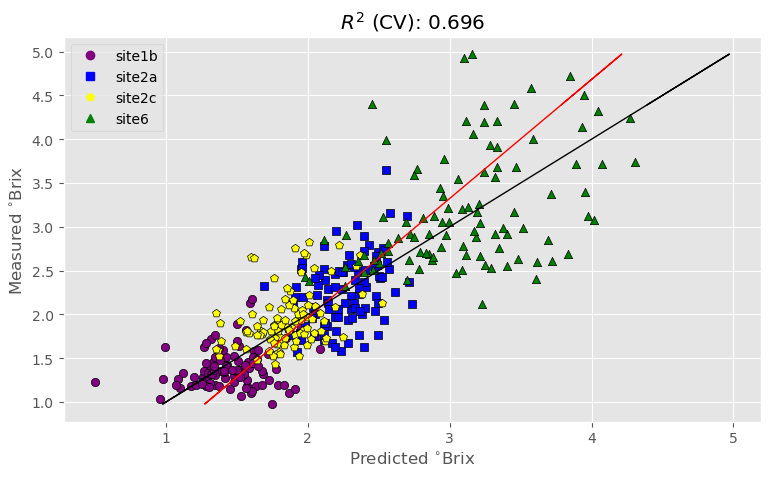

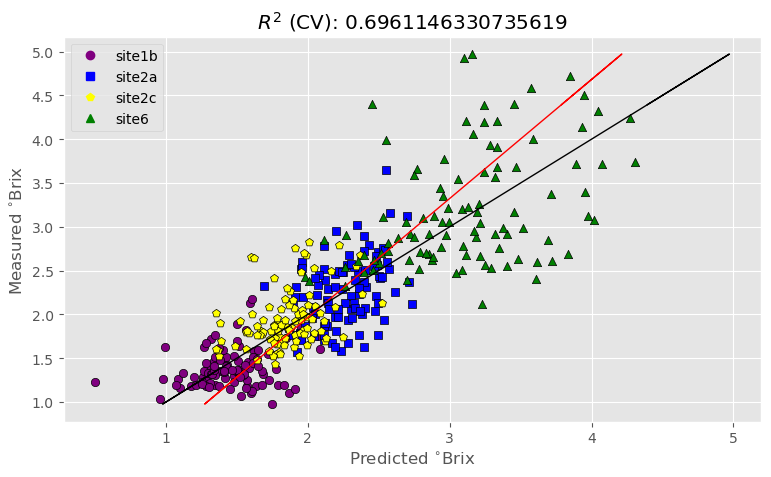

In [19]:
file_name_d15n_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d15n_std_resampled.csv'
simple_pls_cv(opt_Xc_d15n_std, y_d15n_std, ncomp_d15n_std, labels, file_name_d15n_std)

In [20]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_d15n_std, scale=True)
pls_final.fit(opt_Xc_d15n_std, y_d15n_std)

# 1. Compute training stats
X_mean = opt_Xc_d15n_std.mean(axis=0)
X_std = opt_Xc_d15n_std.std(axis=0, ddof=0)  # population std
y_mean = y_d15n_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
# print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Adjusted Intercept: -0.3808241804189465


In [21]:
scaled_coefs

array([-3.46071784e+01, -2.03808028e+01,  5.31139731e+00,  2.50705052e+01,
       -3.39605599e+00,  3.65938822e+00, -2.75806262e+00,  9.43831095e+00,
       -8.78024751e+00,  1.96086218e+01, -1.67823413e+00,  1.05155687e+01,
        1.86921542e+01, -4.71553789e+01, -1.10466008e+01, -1.56464302e+01,
       -3.44954337e+00,  6.50527256e+01, -7.95062750e+00,  1.63449417e+01,
       -3.84886368e+00, -5.31392045e+00,  1.36805178e+01, -6.96645265e-01,
       -3.31107689e+00, -2.99650616e+01,  6.46537986e+01, -2.66532497e+01,
       -9.47710781e+01,  1.12313652e+01,  5.47451118e+01,  4.30242383e+01,
       -3.28646809e+01,  1.65063513e+01, -2.12964944e+00,  1.46658503e+01,
       -1.00558310e+02, -3.23944484e+01, -2.07368798e-03,  6.28307016e+00,
       -8.98486416e+00,  4.36835232e+01,  3.86393306e+01,  1.24369301e-02,
        4.47963788e+01,  6.03454525e+00,  6.61067003e+01, -2.98809018e+01,
        3.36666981e+01, -4.71176304e+00, -5.90062923e+01,  2.45966649e+01,
       -2.06152804e+01,  

# LA

In [8]:
la_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_la.npy',  allow_pickle=True)

In [9]:
y_la_max = np.array(la_trait_pdf_ymax)

y_la_std = np.array(la_trait_pdf_std)

In [10]:
y_la_std.shape

(400, 2)

In [11]:
y_la_max_df = pd.DataFrame(y_la_max, columns=['y_value', 'filename'])
y_la_max_df['filename'] = y_la_max_df['filename'].str.replace('la_', '')

y_la_max_df['y_value'] = pd.to_numeric(y_la_max_df['y_value'])
y_la_max_df_array = y_la_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_la_max_df = pd.merge(df_spectral, y_la_max_df, on='filename')
 # Band columns as predictors
    
X_la_ymax = merged_y_la_max_df.filter(regex='^band_').values 
y_la_max = merged_y_la_max_df[['y_value']].values  

In [12]:
y_la_std_df = pd.DataFrame(y_la_std, columns=['y_value', 'filename'])
y_la_std_df['filename'] = y_la_std_df['filename'].str.replace('la_', '')

y_la_std_df['y_value'] = pd.to_numeric(y_la_std_df['y_value'])
y_la_std_df_array = y_la_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_la_std_df = pd.merge(df_spectral, y_la_std_df, on='filename')
 # Band columns as predictors
    
X_la_std = merged_y_la_std_df.filter(regex='^band_').values 
y_la_std = merged_y_la_std_df[['y_value']].values  

In [13]:
X_la_std.shape

(400, 425)

In [14]:
len(labels)

400

In [15]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(X_la_ymax, y_la_max, 30)

30/30 components processed

Optimal number of components: 18
Start feature index: 387

Wavelength indices to keep: [67, 362, 204, 323, 64, 202, 314, 348, 27, 161, 53, 30, 151, 192, 65, 327, 29, 36, 380, 405, 5, 148, 15, 45, 205, 326, 31, 300, 1, 154, 18, 284, 200, 399, 6, 424, 301, 302]
Corresponding coefficients: [-0.24766117749000088, 0.25030779408682646, -0.2505576992412392, 0.2563439896315105, 0.2586123357985557, 0.26421556531157214, -0.2652313412376165, 0.2668590939105659, -0.2675387356107363, 0.2721370172565899, 0.2867832132377259, -0.2878000980216066, 0.28870761721563953, 0.28950429298495933, 0.2907767016452854, -0.2959893691804669, 0.30040826024742295, 0.3127414505753542, -0.3195320579223666, -0.3202892444183368, -0.3214635263209059, 0.32735659816063206, -0.3279249235472852, -0.32903527622672096, 0.33324844866733316, -0.33898615396017384, 0.3429755648044204, -0.34835891360544297, 0.39825203484335364, -0.42074757669342455, -0.43095499456492853, 0.4502262984910197, -0.46909437573

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.597
R2 CV: 0.450
RMSE calib: 0.273
RMSE CV: 0.319
Intercept: 0.8558145775094055, Slope: 0.5470102763968625


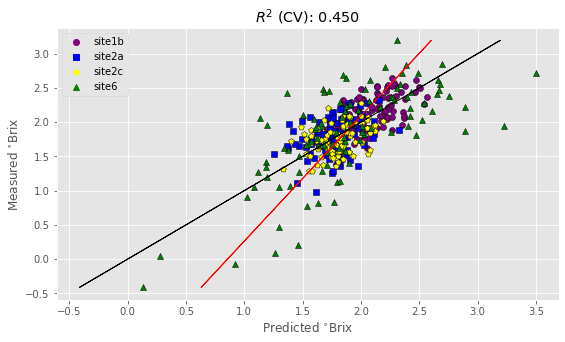

In [16]:
file_name_la_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv/la_max_resampled.csv'
simple_pls_cv(opt_Xc_la_max, y_la_max,                        
                             ncomp_la_max, labels,file_name_la_max)

In [17]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_la_max, scale=True)
pls_final.fit(opt_Xc_la_max, y_la_max)

# 1. Compute training stats
X_mean = opt_Xc_la_max.mean(axis=0)
X_std = opt_Xc_la_max.std(axis=0, ddof=0)  # population std
y_mean = y_la_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [-3.12700592e+01  2.39980002e+01 -7.50056652e-02  2.10748977e+01
 -8.88451039e+00  1.00096186e-01 -4.03986230e+00  3.53162128e+01
 -9.68343166e+00  1.72363123e+01  1.48634883e+01 -5.01901425e+01
  8.67002400e+00  1.19833682e+00  5.37719639e+01 -6.44531554e+00
  7.99919885e+01  4.02831111e+01 -5.22320526e+01 -1.23943781e+01
 -5.43409448e+01  7.55124826e-01 -6.87508480e+01 -7.10901002e+01
  3.79012746e-03 -1.88431473e+01  4.83820058e+01 -3.35663099e-02
  1.25812231e+01 -3.37203278e+01 -2.49450533e+01  1.23969087e+01
 -6.06685777e-02 -2.26905878e+01  8.01083310e+01 -7.65569774e+00
  5.11274820e-02  6.92849175e-02]
Adjusted Intercept: 1.561037919130659


In [18]:
scaled_coefs

array([-3.12700592e+01,  2.39980002e+01, -7.50056652e-02,  2.10748977e+01,
       -8.88451039e+00,  1.00096186e-01, -4.03986230e+00,  3.53162128e+01,
       -9.68343166e+00,  1.72363123e+01,  1.48634883e+01, -5.01901425e+01,
        8.67002400e+00,  1.19833682e+00,  5.37719639e+01, -6.44531554e+00,
        7.99919885e+01,  4.02831111e+01, -5.22320526e+01, -1.23943781e+01,
       -5.43409448e+01,  7.55124826e-01, -6.87508480e+01, -7.10901002e+01,
        3.79012746e-03, -1.88431473e+01,  4.83820058e+01, -3.35663099e-02,
        1.25812231e+01, -3.37203278e+01, -2.49450533e+01,  1.23969087e+01,
       -6.06685777e-02, -2.26905878e+01,  8.01083310e+01, -7.65569774e+00,
        5.11274820e-02,  6.92849175e-02])

30/30 components processed

Optimal number of components: 6
Start feature index: 390

Wavelength indices to keep: [407, 209, 70, 9, 149, 201, 413, 298, 293, 296, 306, 294, 295, 197, 292, 305, 299, 291, 297, 200, 198, 193, 199, 422, 0, 418, 13, 15, 16, 11, 288, 196, 423, 419, 420]
Corresponding coefficients: [-0.01953263459547462, 0.020019106336751424, -0.02020339655086307, 0.02049703032022545, 0.020578348884337645, 0.020792294557977608, -0.02100778964108324, 0.02105276084016942, 0.021242944143416456, 0.021260223660437037, 0.021381378216895813, 0.021387157718597997, 0.021410378710773434, 0.021424605492667417, 0.021440191112958525, 0.021448377440765568, 0.021496757833472834, 0.021506452530626174, 0.021652139276711245, 0.02180686117441923, 0.021902099986916446, -0.02243914122272538, 0.023506479541518667, 0.023840498461434247, 0.025599765415532983, 0.02902115866120735, 0.03003662179812158, 0.030175829318329038, 0.03129360407627414, 0.03596382143077166, 0.046657347064047214, 0.0477334548575

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


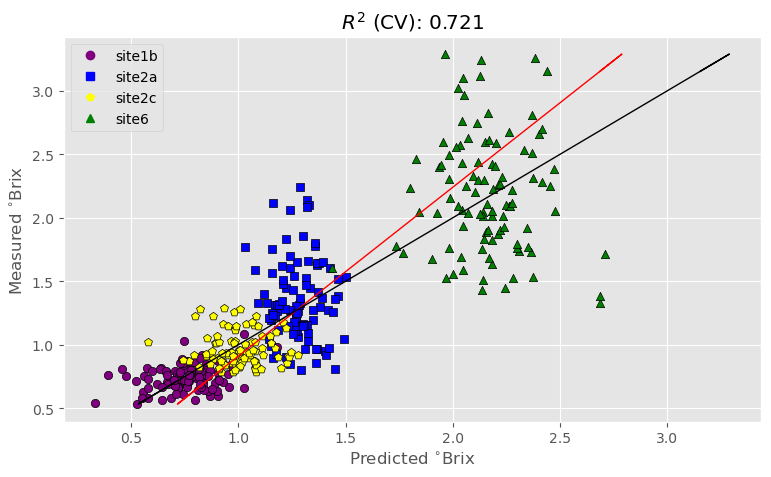

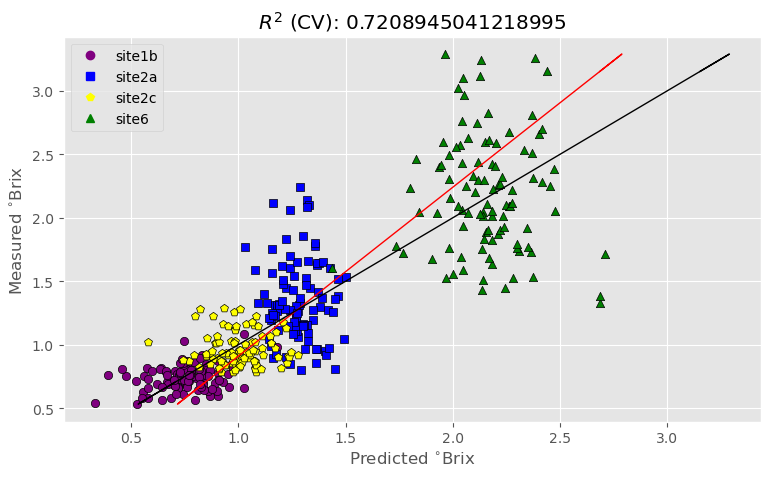

In [19]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(X_la_std, y_la_std, 30)


file_name_la_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv/la_std_resampled.csv'
simple_pls_cv(opt_Xc_la_std, y_la_std,                             
                             ncomp_la_std, labels, file_name_la_std)

In [20]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_la_std, scale=True)
pls_final.fit(opt_Xc_la_std, y_la_std)

# 1. Compute training stats
X_mean = opt_Xc_la_std.mean(axis=0)
X_std = opt_Xc_la_std.std(axis=0, ddof=0)  # population std
y_mean = y_la_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [-9.33918138e+00  2.07031421e-01 -4.63615026e+00  5.26581504e-01
  6.75448720e+00  1.48831148e-03 -3.96140406e+00  7.87941843e-04
  8.28919167e-04  8.12301024e-04  7.85675782e-04  8.47954393e-04
  8.43852724e-04  1.61976647e-03  8.65923747e-04  7.96201378e-04
  8.53835162e-04  8.98299432e-04  8.84180101e-04  2.42114487e-03
  1.85047074e-03 -4.36056731e+00  2.93850587e-03  1.76677153e-01
  6.23479698e+00  1.85499908e+00  1.86143673e+01  1.56253459e+01
  1.71512133e+01  2.24705310e+01  1.20080854e-01  6.66050779e-04
  6.66261078e-01  3.00372204e+00 -4.55252499e-01]
Adjusted Intercept: -1.6676180486264303


In [21]:
scaled_coefs

array([-9.33918138e+00,  2.07031421e-01, -4.63615026e+00,  5.26581504e-01,
        6.75448720e+00,  1.48831148e-03, -3.96140406e+00,  7.87941843e-04,
        8.28919167e-04,  8.12301024e-04,  7.85675782e-04,  8.47954393e-04,
        8.43852724e-04,  1.61976647e-03,  8.65923747e-04,  7.96201378e-04,
        8.53835162e-04,  8.98299432e-04,  8.84180101e-04,  2.42114487e-03,
        1.85047074e-03, -4.36056731e+00,  2.93850587e-03,  1.76677153e-01,
        6.23479698e+00,  1.85499908e+00,  1.86143673e+01,  1.56253459e+01,
        1.71512133e+01,  2.24705310e+01,  1.20080854e-01,  6.66050779e-04,
        6.66261078e-01,  3.00372204e+00, -4.55252499e-01])

# SLA

In [15]:
sla_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_sla.npy',  allow_pickle=True)

In [16]:
y_sla_max = np.array(sla_trait_pdf_ymax)
y_sla_std = np.array(sla_trait_pdf_std)

In [17]:
y_sla_max_df = pd.DataFrame(y_sla_max, columns=['y_value', 'filename'])
y_sla_max_df['filename'] = y_sla_max_df['filename'].str.replace('sla_', '')

y_sla_max_df['y_value'] = pd.to_numeric(y_sla_max_df['y_value'])
y_sla_max_df_array = y_sla_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_sla_max_df = pd.merge(df_spectral, y_sla_max_df, on='filename')
 # Band columns as predictors
    
X_sla_ymax = merged_y_sla_max_df.filter(regex='^band_').values 
y_sla_max = merged_y_sla_max_df[['y_value']].values  

In [18]:
y_sla_std_df = pd.DataFrame(y_sla_std, columns=['y_value', 'filename'])
y_sla_std_df['filename'] = y_sla_std_df['filename'].str.replace('sla_', '')

y_sla_std_df['y_value'] = pd.to_numeric(y_sla_std_df['y_value'])
y_sla_std_df_array = y_sla_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_sla_std_df = pd.merge(df_spectral, y_sla_std_df, on='filename')
 # Band columns as predictors
    
X_sla_std = merged_y_sla_std_df.filter(regex='^band_').values 
y_sla_std = merged_y_sla_std_df[['y_value']].values  

In [19]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(X_sla_ymax, y_sla_max, 30)

30/30 components processed

Optimal number of components: 23
Start feature index: 387

Wavelength indices to keep: [280, 203, 302, 264, 15, 45, 401, 222, 154, 226, 62, 36, 249, 23, 64, 281, 405, 254, 230, 38, 192, 378, 329, 25, 162, 398, 356, 279, 67, 391, 375, 42, 204, 219, 384, 28, 111, 34]
Corresponding coefficients: [0.04408729567369068, 0.0444334174839674, 0.04582542201770937, -0.04634445327939665, -0.047304766470305425, -0.048467638274930266, -0.048477949615175, -0.049818237863954035, -0.04987123388375131, 0.05111893969098801, -0.05237163764854368, 0.052865776545216764, -0.05312142976526182, -0.05479241392437832, 0.05610840329662096, 0.0565177725412142, -0.056931642472306324, -0.05721486510753602, 0.057604460466493736, 0.058345910473064755, 0.05863075680654198, 0.05873025215530981, -0.05914664237920599, 0.059410477533314174, 0.05966534076680862, -0.061319467680709394, -0.062440893037618815, 0.06261080569832567, -0.06328486057419622, 0.0658782252656672, 0.07116462577206918, 0.0769

R2 calib: 0.841
R2 CV: 0.802
RMSE calib: 0.042
RMSE CV: 0.047
Intercept: 0.844386773931323, Slope: 0.8140390688711987


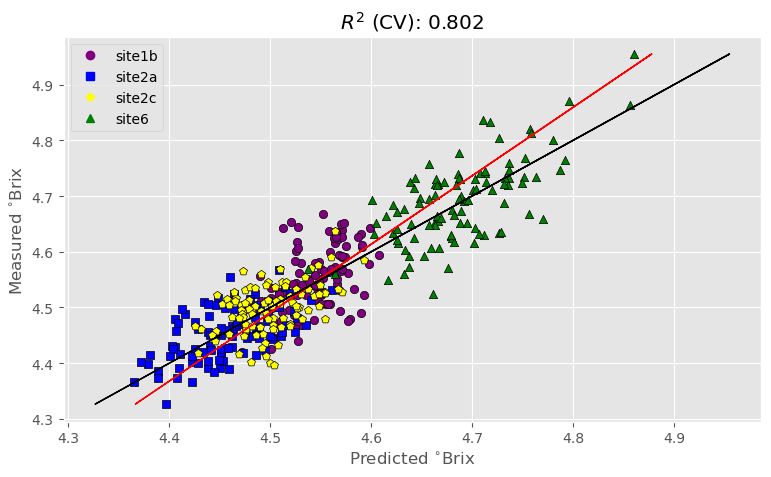

In [32]:
file_name_sla_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\sla_max_resampled.csv'
simple_pls_cv(opt_Xc_sla_max, y_sla_max,                             
                             ncomp_sla_max, labels, file_name_sla_max)

In [14]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_sla_max, scale=True)
pls_final.fit(opt_Xc_sla_max, y_sla_max)

# 1. Compute training stats
X_mean = opt_Xc_sla_max.mean(axis=0)
X_std = opt_Xc_sla_max.std(axis=0, ddof=0)  # population std
y_mean = y_sla_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [ 4.08433299e+00  7.91436847e-03  4.03787057e-03 -4.45450329e+00
 -1.03842625e+01 -7.34689814e+00 -1.87759574e+00 -2.19135119e+00
 -1.88389937e+00  1.37611530e+00 -1.24299051e-01  1.20767565e+01
 -7.01322001e+00 -7.88828985e+00  1.22345302e+00  1.29916389e+00
 -3.44783062e+00 -1.35111532e+00  6.88672616e+00  4.39533185e+00
  1.25232911e+00  3.14243585e+00 -3.91765940e+00  5.07917582e+00
  3.06404769e+00 -2.84429333e+00 -3.13285954e+00  1.05211699e+00
 -4.10759562e+00  1.67521946e+00  7.00698478e+00  9.77627672e+00
 -1.17302076e-02  2.01615748e+00 -3.58523424e+00  1.51450096e+01
 -1.01473935e+00 -1.34818440e+01]
Adjusted Intercept: 4.655244393011403


In [15]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

array([ 4.08433299e+00,  7.91436847e-03,  4.03787057e-03, -4.45450329e+00,
       -1.03842625e+01, -7.34689814e+00, -1.87759574e+00, -2.19135119e+00,
       -1.88389937e+00,  1.37611530e+00, -1.24299051e-01,  1.20767565e+01,
       -7.01322001e+00, -7.88828985e+00,  1.22345302e+00,  1.29916389e+00,
       -3.44783062e+00, -1.35111532e+00,  6.88672616e+00,  4.39533185e+00,
        1.25232911e+00,  3.14243585e+00, -3.91765940e+00,  5.07917582e+00,
        3.06404769e+00, -2.84429333e+00, -3.13285954e+00,  1.05211699e+00,
       -4.10759562e+00,  1.67521946e+00,  7.00698478e+00,  9.77627672e+00,
       -1.17302076e-02,  2.01615748e+00, -3.58523424e+00,  1.51450096e+01,
       -1.01473935e+00, -1.34818440e+01])

In [16]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(X_sla_std, y_sla_std, 30)





30/30 components processed

Optimal number of components: 23
Start feature index: 338

Wavelength indices to keep: [297, 48, 346, 251, 57, 359, 150, 68, 52, 266, 217, 260, 233, 166, 216, 28, 267, 374, 396, 316, 136, 51, 261, 145, 102, 393, 106, 397, 124, 312, 188, 385, 392, 43, 123, 389, 250, 40, 20, 390, 19, 350, 199, 315, 252, 46, 229, 192, 127, 69, 37, 343, 82, 336, 271, 256, 31, 27, 205, 34, 366, 314, 204, 151, 237, 249, 338, 328, 41, 18, 378, 349, 49, 232, 377, 239, 283, 369, 24, 276, 282, 357, 56, 324, 110, 371, 155]
Corresponding coefficients: [0.027993273998957114, 0.0280061442890267, -0.02816309792572021, -0.02818338384980296, -0.028615237968295723, -0.028627296374270448, -0.028733887874163592, 0.02883219260903972, -0.02885522465393213, 0.02894312047450743, -0.029505644896919096, -0.029546862787692016, -0.02960419696813271, 0.029717568020671967, 0.030286251035235266, 0.030682698582763072, 0.030812383099780648, -0.031286831892965924, -0.03165194787774869, -0.03167782587329282, 

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.933
R2 CV: 0.802
RMSE calib: 0.026
RMSE CV: 0.045
Intercept: 0.05889143222523959, Slope: 0.7767180340622732


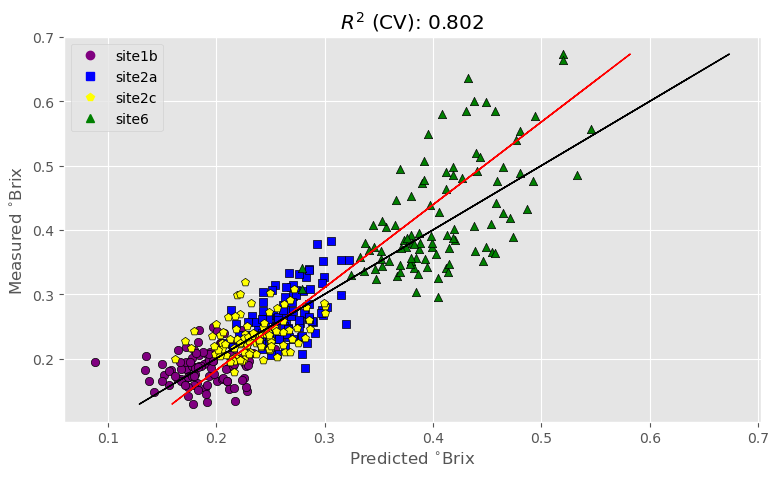

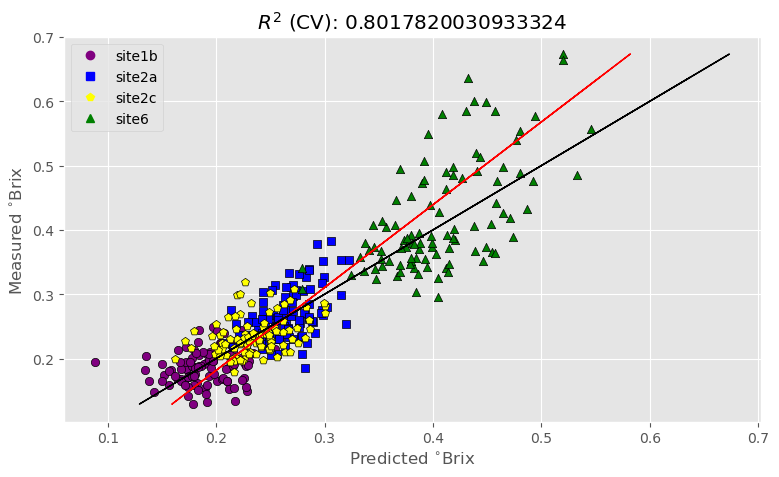

In [17]:

file_name_sla_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\sla_std_resampled.csv'
simple_pls_cv(opt_Xc_sla_std, y_sla_std, ncomp_sla_std, labels, file_name_sla_std)

In [18]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_sla_std, scale=True)
pls_final.fit(opt_Xc_sla_std, y_sla_std)

# 1. Compute training stats
X_mean = opt_Xc_sla_std.mean(axis=0)
X_std = opt_Xc_sla_std.std(axis=0, ddof=0)  # population std
y_mean = y_sla_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [ 5.82925936e-03  2.57741584e+00 -3.00228367e+00 -2.20732492e+00
 -1.21173437e+00 -3.32081257e+00 -4.15452952e-01  9.17362162e-02
 -7.44328478e-01 -1.19979350e-01 -1.17027825e+00 -2.16825647e+00
 -2.79222201e+00 -3.07911274e+00  1.78906441e+00  2.20492005e+00
  1.72502788e+00 -1.60843320e+00 -8.47623254e-01 -6.74578868e-01
  1.51354754e-01  9.12741896e+00  2.68708566e+00  2.50757633e+00
 -8.38088355e-01  2.11533994e+00 -1.16649864e+00  5.95630677e-02
  3.23469168e+00 -1.71843507e-01  1.03856237e+00  6.97833213e-01
  6.57710074e-01 -1.57995481e+00  6.79856643e+00  1.34601476e+00
 -1.71012004e+00  4.09985241e+00  2.61514907e+00  1.77046099e+00
  1.96800966e+00 -6.66847885e-01  7.32906683e-04 -1.05396072e-01
 -6.31215480e-01  2.95237104e+00  3.63431755e+00 -1.18102134e+00
 -7.60925038e+00 -2.03768797e+00  5.12545460e+00 -4.07713865e+00
 -1.69839685e+00 -4.62365404e+00 -6.57499403e-01 -3.67260018e-01
 -7.21903269e+00  2.08912594e+00 -1.34926979e-02 -6.24119211e+00
  4.

In [19]:
scaled_coefs

array([ 5.82925936e-03,  2.57741584e+00, -3.00228367e+00, -2.20732492e+00,
       -1.21173437e+00, -3.32081257e+00, -4.15452952e-01,  9.17362162e-02,
       -7.44328478e-01, -1.19979350e-01, -1.17027825e+00, -2.16825647e+00,
       -2.79222201e+00, -3.07911274e+00,  1.78906441e+00,  2.20492005e+00,
        1.72502788e+00, -1.60843320e+00, -8.47623254e-01, -6.74578868e-01,
        1.51354754e-01,  9.12741896e+00,  2.68708566e+00,  2.50757633e+00,
       -8.38088355e-01,  2.11533994e+00, -1.16649864e+00,  5.95630677e-02,
        3.23469168e+00, -1.71843507e-01,  1.03856237e+00,  6.97833213e-01,
        6.57710074e-01, -1.57995481e+00,  6.79856643e+00,  1.34601476e+00,
       -1.71012004e+00,  4.09985241e+00,  2.61514907e+00,  1.77046099e+00,
        1.96800966e+00, -6.66847885e-01,  7.32906683e-04, -1.05396072e-01,
       -6.31215480e-01,  2.95237104e+00,  3.63431755e+00, -1.18102134e+00,
       -7.60925038e+00, -2.03768797e+00,  5.12545460e+00, -4.07713865e+00,
       -1.69839685e+00, -

# LDMC

In [8]:
ldmc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_ldmc.npy',  allow_pickle=True)

In [9]:
ldmc_trait_pdf_ymax.shape

(400, 2)

In [10]:

y_ldmc_max = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std = np.array(ldmc_trait_pdf_std)

In [11]:
y_ldmc_max_df = pd.DataFrame(ldmc_trait_pdf_ymax, columns=['y_value', 'filename'])
y_ldmc_max_df['filename'] = y_ldmc_max_df['filename'].str.replace('ldmc_', '')

y_ldmc_max_df['y_value'] = pd.to_numeric(y_ldmc_max_df['y_value'])
y_ldmc_max_df_array = y_ldmc_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_ldmc_max_df = pd.merge(df_spectral, y_ldmc_max_df, on='filename')
 # Band columns as predictors
    
X_ldmc_ymax = merged_y_ldmc_max_df.filter(regex='^band_').values 
y_ldmc_max = merged_y_ldmc_max_df[['y_value']].values  

In [12]:
y_ldmc_std_df = pd.DataFrame(ldmc_trait_pdf_std, columns=['y_value', 'filename'])
y_ldmc_std_df['filename'] = y_ldmc_std_df['filename'].str.replace('ldmc_', '')

y_ldmc_std_df['y_value'] = pd.to_numeric(y_ldmc_std_df['y_value'])
y_ldmc_std_df_array = y_ldmc_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_ldmc_std_df = pd.merge(df_spectral, y_ldmc_std_df, on='filename')
 # Band columns as predictors
    
X_ldmc_std = merged_y_ldmc_std_df.filter(regex='^band_').values 
y_ldmc_std = merged_y_ldmc_std_df[['y_value']].values  

In [13]:
X_ldmc_std.shape

(400, 425)

In [14]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(X_ldmc_ymax, y_ldmc_max, 30)


30/30 components processed

Optimal number of components: 20
Start feature index: 307

Wavelength indices to keep: [139, 177, 169, 162, 340, 272, 95, 82, 281, 74, 130, 255, 227, 231, 205, 10, 399, 45, 381, 50, 51, 112, 392, 397, 324, 99, 285, 360, 424, 31, 282, 373, 385, 284, 232, 166, 68, 59, 155, 47, 339, 159, 365, 44, 248, 349, 219, 244, 37, 199, 21, 290, 103, 29, 239, 15, 33, 24, 188, 163, 16, 216, 367, 391, 206, 252, 343, 267, 217, 361, 379, 322, 165, 158, 345, 27, 395, 202, 242, 390, 17, 6, 376, 200, 28, 148, 67, 215, 374, 301, 388, 410, 401, 249, 32, 380, 314, 71, 303, 34, 49, 302, 152, 283, 14, 203, 403, 398, 151, 393, 149, 304, 326, 383, 315, 111, 316, 325]
Corresponding coefficients: [0.03586203963669103, -0.03619150836119243, -0.03631020675589085, -0.03644373535793624, -0.03644601792255158, 0.036581617078672565, 0.03692621359084844, -0.03759080544471062, 0.03774202068320669, -0.037798973581536166, 0.037813398160644905, 0.03791240080662213, -0.03810907797133907, -0.0384262183

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.783
R2 CV: 0.507
RMSE calib: 0.044
RMSE CV: 0.067
Intercept: -0.17953475127924676, Slope: 0.6701631320145119


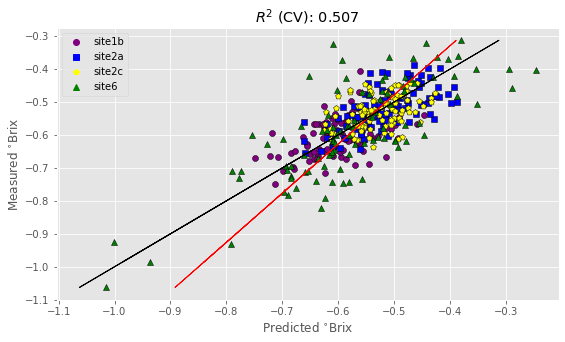

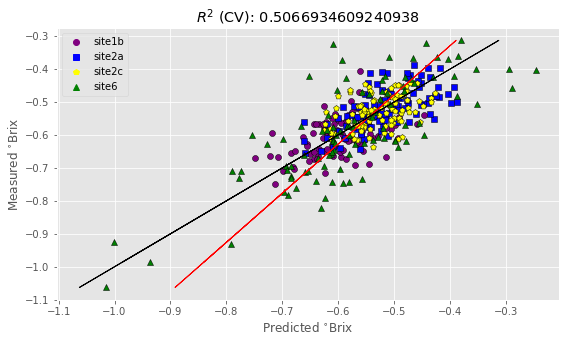

In [15]:
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\ldmc_max_resampled.csv'
simple_pls_cv(opt_Xc_ldmc_max,y_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [16]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_ldmc_max, scale=True)
pls_final.fit(opt_Xc_ldmc_max,y_ldmc_max)

# 1. Compute training stats
X_mean = opt_Xc_ldmc_max.mean(axis=0)
X_std = opt_Xc_ldmc_max.std(axis=0, ddof=0)  # population std
y_mean = y_ldmc_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [ 2.21342168e-01 -1.98914835e+00 -5.98209201e-01 -1.59883835e+00
 -6.47113653e+00  1.49814744e+00  2.71492325e+00  4.80869870e-02
 -3.76745723e-02 -3.20241320e+00  3.65392648e+00  5.22144930e+00
 -5.44131215e-01 -2.78036684e+00  1.36658984e-02 -2.08736906e+00
  2.75585514e+00 -5.95372041e+00  5.55308760e+00  1.00222613e+00
  1.63040691e+01 -1.01641406e+00  3.60424813e+00  2.53469877e+00
 -1.41674189e+00  5.25524687e+00 -4.52126960e-01 -8.76469952e+00
 -7.99380417e-01 -1.25283603e+01 -1.34857650e+00 -1.36698508e+00
  3.52955048e+00 -9.63429827e-01  8.10580480e+00 -2.20909006e+00
  9.46155246e-02  5.15179697e+00  1.36593167e+00 -2.47803319e+00
  6.04250267e+00 -1.57648369e+00 -3.82629577e+00  1.88431393e+00
 -3.51406700e+00 -4.34323841e+00 -1.58193349e+00 -1.82389877e+00
  7.13223334e-01  1.56406597e-03 -3.25470712e+00  8.90444010e-03
  1.39688811e+00  1.01090870e+01 -5.96765354e+00  1.47788992e+01
 -1.86763642e+01 -5.31662615e+00  1.53504599e+00 -1.35891830e+00
 -1.

In [17]:
scaled_coefs

array([ 2.21342168e-01, -1.98914835e+00, -5.98209201e-01, -1.59883835e+00,
       -6.47113653e+00,  1.49814744e+00,  2.71492325e+00,  4.80869870e-02,
       -3.76745723e-02, -3.20241320e+00,  3.65392648e+00,  5.22144930e+00,
       -5.44131215e-01, -2.78036684e+00,  1.36658984e-02, -2.08736906e+00,
        2.75585514e+00, -5.95372041e+00,  5.55308760e+00,  1.00222613e+00,
        1.63040691e+01, -1.01641406e+00,  3.60424813e+00,  2.53469877e+00,
       -1.41674189e+00,  5.25524687e+00, -4.52126960e-01, -8.76469952e+00,
       -7.99380417e-01, -1.25283603e+01, -1.34857650e+00, -1.36698508e+00,
        3.52955048e+00, -9.63429827e-01,  8.10580480e+00, -2.20909006e+00,
        9.46155246e-02,  5.15179697e+00,  1.36593167e+00, -2.47803319e+00,
        6.04250267e+00, -1.57648369e+00, -3.82629577e+00,  1.88431393e+00,
       -3.51406700e+00, -4.34323841e+00, -1.58193349e+00, -1.82389877e+00,
        7.13223334e-01,  1.56406597e-03, -3.25470712e+00,  8.90444010e-03,
        1.39688811e+00,  

# ldmc std

In [18]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(X_ldmc_std, y_ldmc_std, 30)



30/30 components processed

Optimal number of components: 16
Start feature index: 331

Wavelength indices to keep: [83, 44, 18, 325, 21, 253, 175, 294, 34, 395, 256, 357, 305, 303, 292, 295, 342, 343, 166, 229, 123, 291, 243, 201, 210, 67, 327, 197, 31, 297, 318, 192, 331, 113, 402, 359, 5, 232, 386, 391, 260, 406, 204, 43, 399, 110, 108, 339, 13, 19, 317, 37, 385, 153, 29, 4, 349, 323, 68, 254, 148, 403, 198, 255, 272, 219, 38, 17, 46, 221, 304, 65, 49, 30, 40, 190, 312, 15, 282, 307, 313, 3, 199, 371, 398, 45, 328, 16, 155, 283, 24, 284, 424, 314]
Corresponding coefficients: [-0.019268483457918876, -0.019377794638927602, -0.019413948668450847, -0.01956071606201004, 0.019644391950038708, -0.019792105693951192, 0.019807032000263923, 0.01984306197947992, -0.019922560118492638, -0.019968245318683298, -0.019984063636199086, -0.02002814212771299, 0.020049798264533746, -0.020149327772284772, 0.020198972105957846, 0.020237488052126006, -0.020238841166465914, -0.020580630276614803, 0.02071310

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.958
R2 CV: 0.882
RMSE calib: 0.032
RMSE CV: 0.053
Intercept: 0.04200108989419493, Slope: 0.8692904856719311


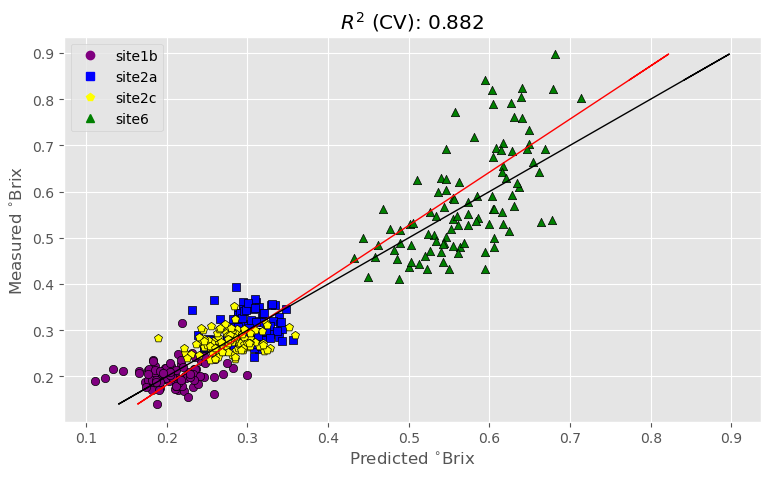

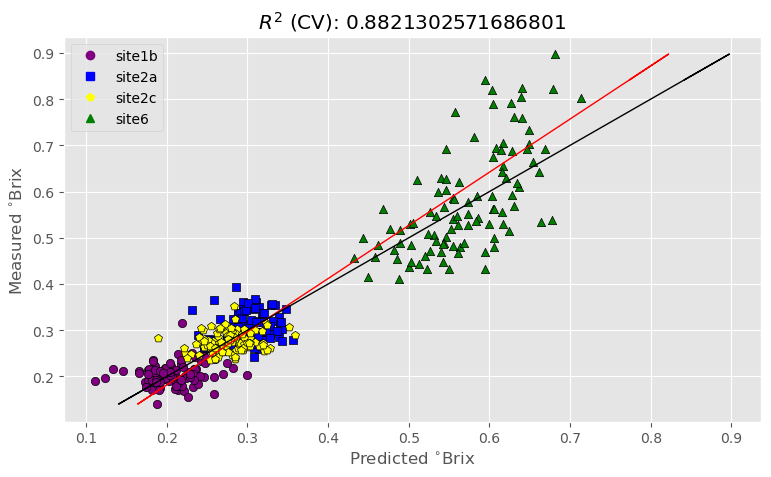

In [19]:
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\ldmc_std_resampled.csv'
simple_pls_cv(opt_Xc_ldmc_std,y_ldmc_std, ncomp_ldmc_std, labels, file_name_ldmc_max)



In [20]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_ldmc_max, scale=True)
pls_final.fit(opt_Xc_ldmc_std,y_ldmc_std)

# 1. Compute training stats
X_mean = opt_Xc_ldmc_std.mean(axis=0)
X_std = opt_Xc_ldmc_std.std(axis=0, ddof=0)  # population std
y_mean = y_ldmc_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [-4.15027909e+00  1.86876752e-01 -4.06797244e+00 -1.27416102e+00
 -5.83357204e-01 -1.35708562e-01  1.89103697e+00  7.78104014e-04
 -1.37185825e+00 -9.70302099e-01 -2.78410332e-01  7.37507384e-02
  6.49788120e-04 -8.42762368e-04  9.34996197e-04  8.95646520e-04
 -1.73861597e+00 -3.86325486e-01  2.27316441e+00  1.77585625e+00
  2.60046410e+00  8.57084122e-04  1.41523323e-02  5.03078051e-03
  5.59423214e-02  1.70150771e+00 -6.94866658e-01  2.74095361e-03
 -6.64839353e+00  2.05173940e-03 -1.72579925e-02 -1.61529196e+00
  9.77195785e-01 -3.16883556e+00  2.44280991e-01 -4.43378061e+00
  2.61358202e+00  3.18143289e+00  4.16108898e+00 -2.64455091e+00
 -3.30187442e+00  8.39491528e-01  1.70254058e-03 -1.40458232e+00
  1.27402272e+00  2.87666950e+00  1.87187591e+00 -8.07813032e-01
  7.73267125e+00 -8.44583067e+00  1.74543679e+00  2.58299659e+00
  3.54464973e+00  1.10917711e-02 -8.54604578e+00 -1.58922403e+00
 -7.55020494e+00  2.67545811e+00  2.11982427e+00 -9.74976083e-01
 -5.

In [21]:
scaled_coefs

array([-4.15027909e+00,  1.86876752e-01, -4.06797244e+00, -1.27416102e+00,
       -5.83357204e-01, -1.35708562e-01,  1.89103697e+00,  7.78104014e-04,
       -1.37185825e+00, -9.70302099e-01, -2.78410332e-01,  7.37507384e-02,
        6.49788120e-04, -8.42762368e-04,  9.34996197e-04,  8.95646520e-04,
       -1.73861597e+00, -3.86325486e-01,  2.27316441e+00,  1.77585625e+00,
        2.60046410e+00,  8.57084122e-04,  1.41523323e-02,  5.03078051e-03,
        5.59423214e-02,  1.70150771e+00, -6.94866658e-01,  2.74095361e-03,
       -6.64839353e+00,  2.05173940e-03, -1.72579925e-02, -1.61529196e+00,
        9.77195785e-01, -3.16883556e+00,  2.44280991e-01, -4.43378061e+00,
        2.61358202e+00,  3.18143289e+00,  4.16108898e+00, -2.64455091e+00,
       -3.30187442e+00,  8.39491528e-01,  1.70254058e-03, -1.40458232e+00,
        1.27402272e+00,  2.87666950e+00,  1.87187591e+00, -8.07813032e-01,
        7.73267125e+00, -8.44583067e+00,  1.74543679e+00,  2.58299659e+00,
        3.54464973e+00,  

# PN

In [8]:
pn_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_pn.npy',  allow_pickle=True)
pn_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_pn.npy',  allow_pickle=True)

In [9]:
y_pn_max = np.array(pn_trait_pdf_ymax)

y_pn_std = np.array(pn_trait_pdf_std)

In [10]:
y_pn_max.shape

(400, 2)

In [11]:
y_pn_max_df = pd.DataFrame(y_pn_max, columns=['y_value', 'filename'])
y_pn_max_df['filename'] = y_pn_max_df['filename'].str.replace('pn_', '')

y_pn_max_df['y_value'] = pd.to_numeric(y_pn_max_df['y_value'])
y_pn_max_df_array = y_pn_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pn_max_df = pd.merge(df_spectral, y_pn_max_df, on='filename')
 # Band columns as predictors
    
X_pn_ymax = merged_y_pn_max_df.filter(regex='^band_').values 
y_pn_max = merged_y_pn_max_df[['y_value']].values  

In [12]:
y_pn_std_df = pd.DataFrame(y_pn_std, columns=['y_value', 'filename'])
y_pn_std_df['filename'] = y_pn_std_df['filename'].str.replace('pn_', '')

y_pn_std_df['y_value'] = pd.to_numeric(y_pn_std_df['y_value'])
y_pn_std_df_array = y_pn_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pn_std_df = pd.merge(df_spectral, y_pn_std_df, on='filename')
 # Band columns as predictors
    
X_pn_std = merged_y_pn_std_df.filter(regex='^band_').values 
y_pn_std = merged_y_pn_std_df[['y_value']].values  

In [13]:
opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(X_pn_ymax, y_pn_max, 30)

30/30 components processed

Optimal number of components: 15
Start feature index: 304

Wavelength indices to keep: [207, 261, 100, 319, 183, 381, 163, 28, 394, 112, 185, 423, 282, 338, 346, 184, 387, 343, 62, 47, 59, 44, 283, 361, 374, 316, 276, 143, 363, 397, 263, 162, 156, 385, 300, 391, 331, 129, 217, 158, 275, 17, 377, 20, 103, 272, 153, 66, 209, 121, 204, 280, 176, 326, 4, 221, 265, 375, 178, 228, 191, 330, 117, 301, 27, 259, 269, 21, 40, 26, 111, 200, 115, 203, 24, 145, 154, 264, 67, 239, 65, 366, 206, 320, 302, 329, 68, 267, 249, 2, 399, 424, 390, 218, 147, 157, 25, 268, 266, 400, 328, 303, 396, 155, 307, 205, 161, 31, 22, 408, 212, 405, 216, 393, 15, 214, 35, 36, 30, 284, 313]
Corresponding coefficients: [-0.058738535709963055, 0.05884050963687201, 0.05886944141886464, 0.05930205050170353, 0.05960616428930451, -0.05979707287249781, -0.0609321048776413, 0.06210922290338673, -0.062436909928718, 0.06298447605234123, 0.06306111953665813, 0.06380208614930488, -0.0638641707312538, 0.

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.773
R2 CV: 0.559
RMSE calib: 0.117
RMSE CV: 0.163
Intercept: 0.1647146546240389, Slope: 0.6186195219143734


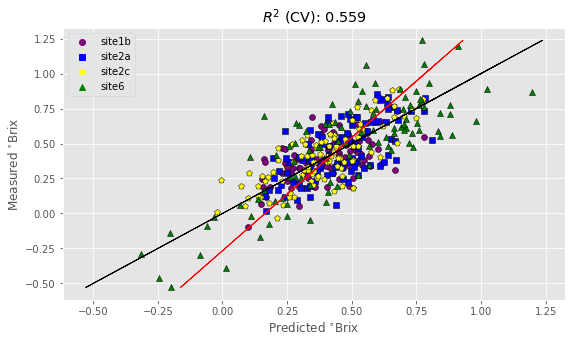

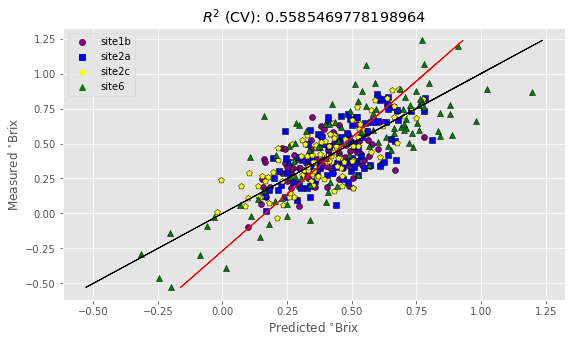

In [15]:


file_name_pn_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pn_max_resampled.csv'
simple_pls_cv(opt_Xc_pn_max, y_pn_max, ncomp_pn_max, labels, file_name_pn_max)

In [17]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pn_max, scale=True)
pls_final.fit(opt_Xc_pn_max, y_pn_max)

# 1. Compute training stats
X_mean = opt_Xc_pn_max.mean(axis=0)
X_std = opt_Xc_pn_max.std(axis=0, ddof=0)  # population std
y_mean = y_pn_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Scaled Coefficients: [-2.74179755e-01  3.12507080e+00  2.47073513e+00  8.78944277e-01
  1.89810925e+00 -8.12010825e+00  6.76008182e-01  3.30648253e+01
 -3.46202359e+00  2.37875561e+00  3.57754665e+00  6.33993986e-01
 -3.59402117e+00  5.10353652e+00 -7.68071641e+00  1.77469503e+00
  4.79437315e+00 -4.82110508e+00  2.32525537e+00 -8.52372921e+00
  6.53712743e+00  1.45632826e+01 -2.94847468e+00  3.32888751e+00
 -4.53857584e+00 -1.26016690e-01  7.37138662e-01  2.45151226e+00
  6.01933773e+00  1.79279397e+00  1.36542430e+00 -2.12970920e+00
 -4.25440175e+00  5.31845681e+00  1.17806699e-02  1.09480989e+01
  2.60248267e+00 -7.78456544e-01  1.98897288e+00 -2.28511752e-01
  2.22401883e+00 -4.01284988e+00 -1.38642549e+01  1.94366459e+01
  4.66845199e+00  4.71451527e+00 -3.93986224e+00  8.78567171e+00
 -4.99209249e-01 -2.11625252e+00 -3.35326584e-02 -7.37829055e+00
  3.94765854e+00  2.65820124e+00 -1.43860623e+01 -5.19022552e+00
  7.18160385e-01 -6.77731992e+00  3.63947354e+00 -5.78151759e+00
 -2.

In [18]:
scaled_coefs

array([-2.74179755e-01,  3.12507080e+00,  2.47073513e+00,  8.78944277e-01,
        1.89810925e+00, -8.12010825e+00,  6.76008182e-01,  3.30648253e+01,
       -3.46202359e+00,  2.37875561e+00,  3.57754665e+00,  6.33993986e-01,
       -3.59402117e+00,  5.10353652e+00, -7.68071641e+00,  1.77469503e+00,
        4.79437315e+00, -4.82110508e+00,  2.32525537e+00, -8.52372921e+00,
        6.53712743e+00,  1.45632826e+01, -2.94847468e+00,  3.32888751e+00,
       -4.53857584e+00, -1.26016690e-01,  7.37138662e-01,  2.45151226e+00,
        6.01933773e+00,  1.79279397e+00,  1.36542430e+00, -2.12970920e+00,
       -4.25440175e+00,  5.31845681e+00,  1.17806699e-02,  1.09480989e+01,
        2.60248267e+00, -7.78456544e-01,  1.98897288e+00, -2.28511752e-01,
        2.22401883e+00, -4.01284988e+00, -1.38642549e+01,  1.94366459e+01,
        4.66845199e+00,  4.71451527e+00, -3.93986224e+00,  8.78567171e+00,
       -4.99209249e-01, -2.11625252e+00, -3.35326584e-02, -7.37829055e+00,
        3.94765854e+00,  

30/30 components processed

Optimal number of components: 18
Start feature index: 310

Wavelength indices to keep: [6, 21, 180, 56, 229, 10, 387, 50, 386, 222, 247, 71, 115, 378, 113, 225, 234, 232, 264, 373, 22, 147, 388, 263, 33, 268, 405, 257, 54, 150, 219, 35, 328, 409, 324, 323, 74, 206, 61, 8, 5, 151, 318, 154, 26, 214, 29, 371, 192, 256, 46, 355, 283, 37, 316, 404, 360, 400, 265, 51, 357, 114, 155, 341, 15, 3, 224, 36, 351, 329, 319, 72, 356, 220, 282, 20, 398, 23, 215, 393, 216, 149, 395, 191, 343, 2, 16, 340, 204, 389, 353, 321, 66, 344, 52, 401, 32, 320, 322, 403, 18, 281, 348, 350, 346, 38, 349, 24, 31, 345, 352, 394, 218, 217, 68]
Corresponding coefficients: [-0.04654694557247289, -0.04660904517618468, 0.04683032272403412, -0.04707764349327097, 0.04727603698262885, -0.04756056787387209, 0.04792775936939808, -0.04813460969944864, 0.048181916358088966, 0.04828452290172818, -0.04829534421934448, -0.04850195925741232, 0.04867393433642764, -0.04907056064284987, 0.049155147209151

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Intercept: 0.11531842277137243, Slope: 0.7912232924463699


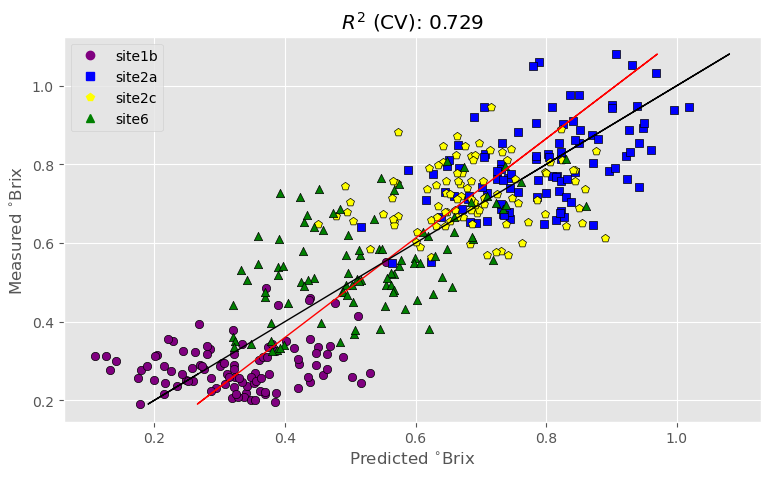

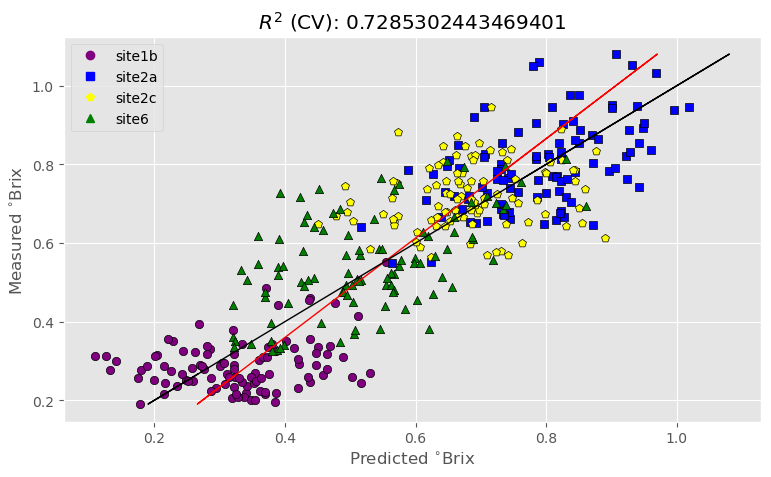

In [19]:
opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(X_pn_std, y_pn_std, 30)


file_name_pn_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pn_std_resampled.csv'
simple_pls_cv(opt_Xc_pn_std,y_pn_std,
                             ncomp_pn_std, labels, file_name_pn_std)

In [22]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pn_std, scale=True)
pls_final.fit(opt_Xc_pn_std,y_pn_std)

# 1. Compute training stats
X_mean = opt_Xc_pn_std.mean(axis=0)
X_std = opt_Xc_pn_std.std(axis=0, ddof=0)  # population std
y_mean = y_pn_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
# print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Adjusted Intercept: 0.12047491714654601


In [23]:
scaled_coefs

array([-6.27101991e+00, -1.22913346e+00,  4.69908518e+00,  3.22413851e+00,
        3.92414516e+00, -2.64530831e+01,  5.13349601e+00, -4.77555839e+00,
       -6.27896363e-01,  1.48353157e+00, -2.28709396e+00,  1.24179896e-01,
        5.95412192e-01, -8.61927979e-01,  4.07011100e+00,  5.30765169e+00,
        4.03810589e+00,  6.08809821e+00,  7.06994255e+00, -1.93391890e+00,
        1.17491123e+01,  4.52912165e+00,  3.02259871e+00,  4.16422192e+00,
        6.85604348e+00, -8.22102916e+00, -3.55297416e+00, -1.40089113e+00,
       -6.06052925e+00, -1.41250130e-01, -1.12626773e+00, -5.32649997e+00,
        5.50082497e-01,  6.94093195e+00, -3.20627159e+00,  3.89779816e+00,
       -9.81565995e-02,  5.29849911e-02, -7.62650925e-02,  6.42058399e+00,
       -5.04097404e+00,  4.41752259e+00,  1.19673978e-01, -3.97043116e+00,
       -5.53364337e-01,  5.31429373e-01,  9.42760399e+00,  8.78440843e+00,
       -2.21824805e+00, -5.83232867e+00,  4.64159063e+00, -4.25810496e+00,
        1.48227989e-01,  

# PC

In [8]:
pc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_pc.npy',  allow_pickle=True)

In [9]:
y_pc_max = np.array(pc_trait_pdf_ymax)

y_pc_std = np.array(pc_trait_pdf_std)

In [10]:
y_pc_max_df = pd.DataFrame(y_pc_max, columns=['y_value', 'filename'])
y_pc_max_df['filename'] = y_pc_max_df['filename'].str.replace('pc_', '')

y_pc_max_df['y_value'] = pd.to_numeric(y_pc_max_df['y_value'])
y_pc_max_df_array = y_pc_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pc_max_df = pd.merge(df_spectral, y_pc_max_df, on='filename')
 # Band columns as predictors
    
X_pc_ymax = merged_y_pc_max_df.filter(regex='^band_').values 
y_pc_max = merged_y_pc_max_df[['y_value']].values  

In [11]:
y_pc_std_df = pd.DataFrame(y_pc_std, columns=['y_value', 'filename'])
y_pc_std_df['filename'] = y_pc_std_df['filename'].str.replace('pc_', '')

y_pc_std_df['y_value'] = pd.to_numeric(y_pc_std_df['y_value'])
y_pc_std_df_array = y_pc_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pc_std_df = pd.merge(df_spectral, y_pc_std_df, on='filename')
 # Band columns as predictors
    
X_pc_std = merged_y_pc_std_df.filter(regex='^band_').values 
y_pc_std = merged_y_pc_std_df[['y_value']].values  

30/30 components processed

Optimal number of components: 27
Start feature index: 395

Wavelength indices to keep: [57, 378, 286, 327, 379, 43, 385, 29, 17, 315, 336, 322, 249, 326, 110, 69, 202, 226, 393, 152, 122, 187, 301, 300, 23, 59, 39, 112, 200, 199]
Corresponding coefficients: [0.035278567849997604, -0.035321527044924486, 0.03601078766578015, -0.03609978548861235, 0.03633586610891958, -0.03641082693661949, 0.03705280073720284, 0.037582230537842695, 0.03833001381832512, 0.038357053884543225, -0.03897439973176956, 0.03932384691618064, 0.039755217465251846, -0.0407797260478319, -0.04238227653252179, 0.04340348544277579, 0.043479455905910194, -0.044420643392458284, 0.04662768757279079, 0.047811664857655964, -0.04892781943585402, 0.04930810626452125, 0.04947883579673253, -0.0495927625235879, -0.052507551847651754, 0.054795360266922, -0.058281225879552326, 0.07643449890124954, -0.08888525369739271, 0.09651158759217601]

Index and coefficient pairs:
Index 57: Coefficient 0.035279
Inde

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 calib: 0.663
R2 CV: 0.512
RMSE calib: 0.023
RMSE CV: 0.028
Intercept: 1.6548546659536474, Slope: 0.5700767785535562


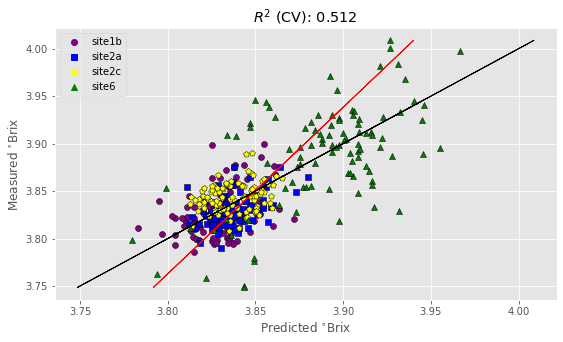

In [12]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(X_pc_ymax, y_pc_max, 30)

file_name_pc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pc_max_resampled.csv'
simple_pls_cv(opt_Xc_pc_max, y_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

In [13]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pc_max, scale=True)
pls_final.fit(opt_Xc_pc_max, y_pc_max)

# 1. Compute training stats
X_mean = opt_Xc_pc_max.mean(axis=0)
X_std = opt_Xc_pc_max.std(axis=0, ddof=0)  # population std
y_mean = y_pc_max.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
# print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Adjusted Intercept: 3.8537494612817924


array([ 4.46779059e-01, -1.50568070e+00,  2.40723760e-01, -9.50028393e-01,
        1.32318845e+00, -5.16819977e+00,  2.54325791e+00,  3.58040824e+00,
        5.00380464e+00,  5.55901647e-01, -2.25709645e+00,  6.47089371e+00,
       -1.88419877e-01, -1.79819872e+00, -1.76807701e+00,  2.45553070e+00,
        4.49013974e-03, -4.86370658e+00,  1.74444098e+00, -5.88541691e-01,
       -2.64015644e+00,  2.58937551e+00,  2.28986359e-03, -3.19695320e-03,
       -6.58931995e+00,  2.69547217e+00, -3.21859582e+00,  2.69088486e+00,
       -6.58786343e-03,  4.79231212e-03])

Filenames meeting the conditions:


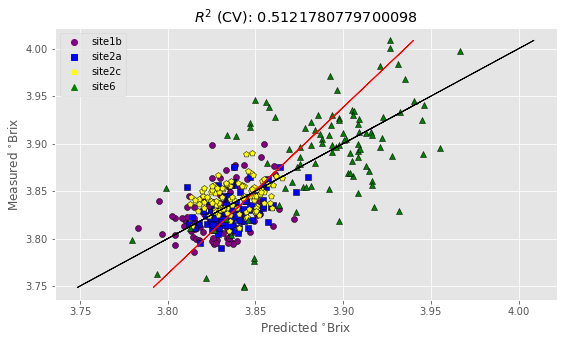

In [14]:
scaled_coefs

30/30 components processed

Optimal number of components: 17
Start feature index: 363

Wavelength indices to keep: [349, 26, 20, 41, 32, 190, 24, 4, 249, 49, 399, 35, 343, 324, 44, 69, 328, 276, 31, 369, 237, 151, 203, 402, 60, 284, 22, 46, 303, 51, 398, 232, 7, 123, 308, 255, 300, 37, 240, 385, 393, 325, 254, 326, 283, 304, 371, 148, 357, 16, 45, 314, 34, 110, 307, 155, 313, 282, 316, 199, 302, 424]
Corresponding coefficients: [-0.007385526670045835, -0.007465638792489314, 0.007500309036256227, 0.007590999560229151, -0.007594893273153893, 0.0076025119208314035, 0.007606898192889707, -0.0076142231522067436, 0.007623051457718798, -0.0076592772979454694, 0.0077039860410845545, 0.007781100313062722, -0.00783563702567057, -0.007842841665672968, -0.007932946391077474, -0.008005649036323255, 0.008024615929215748, -0.008051819593930164, -0.008074119112852626, 0.008123699214115996, 0.008133782593970877, 0.008320785011167531, 0.008327389190310222, 0.008683791952879048, -0.008694697258108368, -0

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


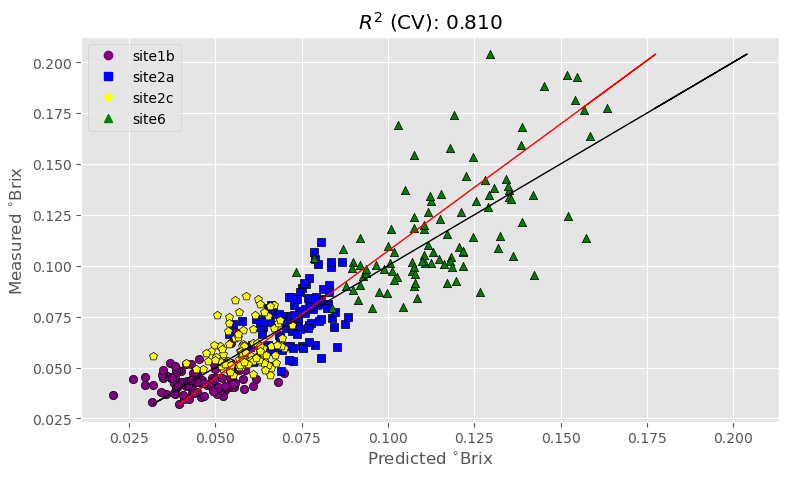

In [15]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(X_pc_std, y_pc_std, 30)


file_name_pc_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pc_std_resampled.csv'
simple_pls_cv(opt_Xc_pc_std, y_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

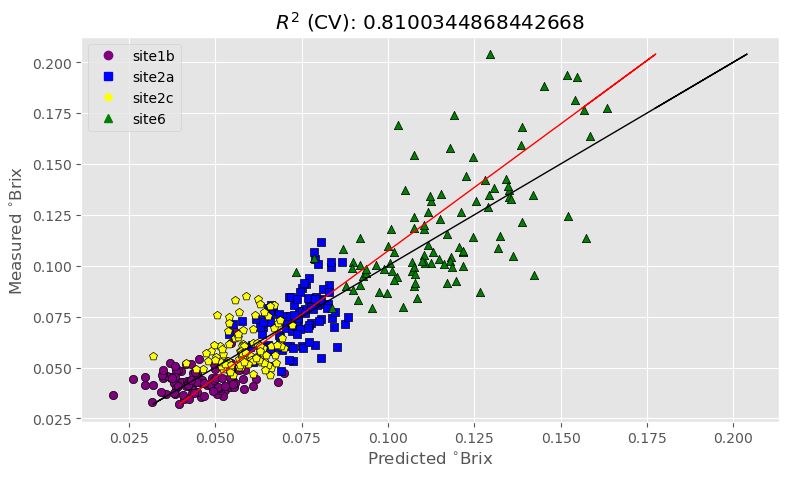

In [16]:
# opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(X_pc_std, y_pc_std, 30)


# file_name_pc_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pc_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pc_std,
#                              y_pc_std,
#                              y_pc_std_df_array,
#                              ncomp_pc_std, labels, file_name_pc_std)

In [17]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pc_std, scale=True)
pls_final.fit(opt_Xc_pc_std, y_pc_std)

# 1. Compute training stats
X_mean = opt_Xc_pc_std.mean(axis=0)
X_std = opt_Xc_pc_std.std(axis=0, ddof=0)  # population std
y_mean = y_pc_std.mean()

# 2. Get raw coefficients from model
coefs = pls_final.coef_.flatten()

# 3. Adjust to raw-scale coefficients
scaled_coefs = coefs / X_std
adjusted_intercept = y_mean - np.dot(X_mean, scaled_coefs)

# 4. Print for confirmation
# print("Scaled Coefficients:", scaled_coefs)
print("Adjusted Intercept:", adjusted_intercept)



Adjusted Intercept: -0.004880376809574594


In [18]:
scaled_coefs

array([-1.97437040e+00, -8.24524405e-01,  2.64025346e+00,  6.98225770e-01,
        5.76952503e-01, -1.05268535e-01,  1.89897634e+00,  2.53898750e-02,
        6.34318020e-02,  2.68840777e-02,  3.57203236e-01,  1.99725780e+00,
       -1.16702168e+00, -1.07365098e-01,  2.48665691e-01, -1.39475379e+00,
        9.28130680e-02, -2.24110839e-01, -2.64864376e+00,  1.84029553e+00,
        6.33421114e-01,  5.93077270e-01, -4.90032053e-04,  3.32860017e-01,
       -2.09385803e+00, -1.91825980e-03, -1.26274229e+00,  1.26948341e+00,
        1.36264644e-03,  2.98997905e+00,  5.81160369e-02,  1.68124091e+00,
       -1.25128428e+00,  8.88650753e-01, -7.35235200e-04, -2.82865904e-01,
        1.45487374e-03,  2.04166831e+00,  5.33162920e-01,  7.22130564e-01,
        6.88236595e-01, -2.12808550e-01, -1.71077307e+00, -4.07796688e-01,
        3.76976688e-01,  8.16506915e-04,  1.64894474e+00, -4.15981079e-01,
       -1.59760433e+00,  2.09790989e+00, -2.38567998e+00, -2.49609201e-01,
       -2.98961960e+00,  

In [83]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_std, y_pc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_std][wav_pc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(101,) (101,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.08305604,  0.02563276,  0.07001932, -0.07330928, -0.02959904,
       -0.06181238,  0.05166224,  0.0423939 ,  0.08608444,  0.03241446,
        0.00589102,  0.03105683,  0.03610003, -0.07109218, -0.01392581,
       -0.08098043,  0.05535809,  0.0436423 ,  0.06043147, -0.09003709,
       -0.03564026, -0.06876465, -0.02642302,  0.01485242,  0.07402576,
        0.03041181,  0.06124964, -0.04902139,  0.04406641,  0.01223253,
       -0.04552591, -0.02248769, -0.06851422,  0.06682079, -0.01776066,
        0.01342628, -0.06237076,  0.0108453 , -0.02556704, -0.04705706,
       -0.04222951,  0.0637625 , -0.06987194,  0.08712824, -0.06206856,
        0.06909553, -0.06813872,  0.01971074,  0.04089133,  0.03832639,
        0.035126  , -0.06999792,  0.06964782,  0.00515899, -0.0722595 ,
        0.00646491, -0.0654743 , -0.07860738,  0.08014102,  0.07077531,
        0.08535242,  0.03833126, -0.07515243, -0.08364529,  0.06712663,
       -0.09733121,  0.07829827, -0.08182713,  0.06428929,  0.06

In [84]:
optimal_pls_sla.intercept_

array([0.15281088])

In [85]:
bands_sla

array(['band_331', 'band_133', 'band_332', 'band_349', 'band_156',
       'band_270', 'band_125', 'band_379', 'band_262', 'band_235',
       'band_52', 'band_236', 'band_404', 'band_96', 'band_268',
       'band_48', 'band_147', 'band_113', 'band_144', 'band_252',
       'band_217', 'band_352', 'band_162', 'band_58', 'band_170',
       'band_118', 'band_149', 'band_364', 'band_92', 'band_69',
       'band_81', 'band_34', 'band_396', 'band_373', 'band_185',
       'band_21', 'band_177', 'band_72', 'band_221', 'band_88',
       'band_393', 'band_148', 'band_61', 'band_137', 'band_40',
       'band_54', 'band_145', 'band_226', 'band_153', 'band_371',
       'band_389', 'band_178', 'band_94', 'band_233', 'band_65',
       'band_26', 'band_357', 'band_164', 'band_381', 'band_103',
       'band_85', 'band_44', 'band_143', 'band_355', 'band_258',
       'band_224', 'band_165', 'band_342', 'band_380', 'band_59',
       'band_220', 'band_24', 'band_176', 'band_337', 'band_42',
       'band_216'

In [2]:
import os
from collections import defaultdict

# Path to the folder containing the files
folder_path = r"D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\version4\d15n"

# Initialize a dictionary to store counts for each site
site_counts = defaultdict(set)

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file name contains a site identifier
    if any(site in file_name for site in ['site1b', 'site2a', 'site2c', 'site6']):
        # Extract the site identifier
        for site in ['site1b', 'site2a', 'site2c', 'site6']:
            if site in file_name:
                # Add the file name to the set for this site
                site_counts[site].add(file_name)
                break

# Calculate the number of unique items for each site
unique_counts = {site: len(files) for site, files in site_counts.items()}

# Print the results
for site, count in unique_counts.items():
    print(f"{site}: {count} unique files")


site1b: 161 unique files
site2a: 71 unique files
site2c: 90 unique files
site6: 161 unique files
